<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/kprototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#  explain the output of any machine learning model.
!pip install shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.9 MB/s eta 0:00:00


In [3]:
# Outlier Detection (Anomaly Detection)
!pip install pyod --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [5]:
# Factor analysis in Python: PCA, CA, MCA, MFA, FAMD, GPA
!pip install prince --quiet

In [6]:
#  k-modes and k-prototypes clustering algorithms for clustering categorical data.
!pip install kmodes --quiet

In [7]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotnine import *
import plotnine

# sklearn ML
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report
import lightgbm as lgb

import shap
import prince

from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer
from kmodes.kprototypes import KPrototypes


In [8]:
# Read Excel data file
df_dist = pd.read_excel("dataset_cluster_dec.xlsx")
df_dist.head()


,WRAPNo,AgeAtVisit,bmi_mean,bmi_var,Ab40_mean,Ab40_var,Ab42_mean,Ab42_var,Ab40_Ab42_ratio_mean,Ab40_Ab42_ratio_var,...,DEC_5,DEC_6,DEC_7,DEC_8,DEC_9,DEC_10,DEC_11,DEC_12,DEC_13,DEC_14
0,0018,0.607200,0.363945,0.000000,0.389494,0.000000,0.358386,0.000000,0.041749,0.000000e+00,...,1,1,3,5,7,8,10,0,2,10
1,0028,0.630137,0.341039,0.000065,0.296735,0.000028,0.283925,0.001246,0.043660,7.346802e-05,...,2,1,3,6,0,7,1,5,4,4
2,0041,0.730487,0.292400,0.000103,0.452595,0.000500,0.476688,0.000830,0.031189,5.026498e-06,...,4,5,3,1,2,5,9,8,0,4
3,0044,0.546352,0.342100,0.000000,0.322291,0.000000,0.409186,0.000000,0.024385,0.000000e+00,...,2,2,2,2,0,7,0,5,1,1
4,0059,0.612297,0.475292,0.000137,0.460483,0.000045,0.499652,0.000004,0.029153,8.951379e-07,...,3,0,6,7,8,8,8,7,9,1


In [9]:
# Dataframe basic info
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WRAPNo                389 non-null    object 
 1   AgeAtVisit            389 non-null    float64
 2   bmi_mean              389 non-null    float64
 3   bmi_var               389 non-null    float64
 4   Ab40_mean             389 non-null    float64
 5   Ab40_var              389 non-null    float64
 6   Ab42_mean             389 non-null    float64
 7   Ab42_var              389 non-null    float64
 8   Ab40_Ab42_ratio_mean  389 non-null    float64
 9   Ab40_Ab42_ratio_var   389 non-null    float64
 10  GFAP_mean             389 non-null    float64
 11  GFAP_var              389 non-null    float64
 12  ptau181_mean          389 non-null    float64
 13  ptau181_var           389 non-null    float64
 14  pTau217_mean          389 non-null    float64
 15  pTau217_var           3

In [10]:
# Drop first column and all DEC ones
df = df_dist.iloc[:, 1:41]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtVisit            389 non-null    float64
 1   bmi_mean              389 non-null    float64
 2   bmi_var               389 non-null    float64
 3   Ab40_mean             389 non-null    float64
 4   Ab40_var              389 non-null    float64
 5   Ab42_mean             389 non-null    float64
 6   Ab42_var              389 non-null    float64
 7   Ab40_Ab42_ratio_mean  389 non-null    float64
 8   Ab40_Ab42_ratio_var   389 non-null    float64
 9   GFAP_mean             389 non-null    float64
 10  GFAP_var              389 non-null    float64
 11  ptau181_mean          389 non-null    float64
 12  ptau181_var           389 non-null    float64
 13  pTau217_mean          389 non-null    float64
 14  pTau217_var           389 non-null    float64
 15  insulin_mean          3

<h1> Preprocessing </h1>

In [11]:
# No need the data have been already scaled and normalized

#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OrdinalEncoder

#pipe = Pipeline([('ordinal', OrdinalEncoder()), ('scaler', PowerTransformer())])
#pipe_fit = pipe.fit(df)

#data = pd.DataFrame(pipe_fit.transform(df), columns = df.columns)

# Explore outliers
data = df.copy()
data


,AgeAtVisit,bmi_mean,bmi_var,Ab40_mean,Ab40_var,Ab42_mean,Ab42_var,Ab40_Ab42_ratio_mean,Ab40_Ab42_ratio_var,GFAP_mean,...,s_bp_adj_var,d_bp_adj_mean,d_bp_adj_var,gender,carrier,race,final_bmi_cat,final_htn_cat,final_diab_cat,final_highchol_cat
0,0.607200,0.363945,0.000000,0.389494,0.000000,0.358386,0.000000,0.041749,0.000000e+00,0.225000,...,0.000000,0.728814,0.000000,1,1,4,1,0,0,1
1,0.630137,0.341039,0.000065,0.296735,0.000028,0.283925,0.001246,0.043660,7.346802e-05,0.164679,...,0.002208,0.728814,0.000287,1,0,4,1,1,0,1
2,0.730487,0.292400,0.000103,0.452595,0.000500,0.476688,0.000830,0.031189,5.026498e-06,0.594231,...,0.025554,0.451977,0.032845,2,1,4,0,0,0,0
3,0.546352,0.342100,0.000000,0.322291,0.000000,0.409186,0.000000,0.024385,0.000000e+00,0.139423,...,0.000000,0.542373,0.000000,2,1,4,1,0,0,1
4,0.612297,0.475292,0.000137,0.460483,0.000045,0.499652,0.000004,0.029153,8.951379e-07,0.328846,...,0.000068,0.567797,0.007038,2,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,0.484549,0.587169,0.001676,0.294605,0.002102,0.413709,0.001749,0.020241,5.309655e-07,0.091731,...,0.000608,0.483051,0.003591,2,0,3,1,1,1,1
385,0.352342,0.615058,0.000169,0.328285,0.002455,0.563210,0.003969,0.009864,3.051967e-06,0.143846,...,0.001217,0.327684,0.004692,2,0,4,1,1,0,1
386,0.895827,0.397561,0.000038,0.210128,0.000002,0.225470,0.003371,0.043453,2.981646e-04,0.345192,...,0.001690,0.576271,0.057455,2,0,3,1,0,0,1
387,0.149411,0.316755,0.000133,0.231188,0.000025,0.397008,0.000054,0.014022,2.695265e-08,0.120577,...,0.000608,0.211864,0.001293,2,0,5,1,0,0,0


<h1> Get Outliers </h1>

In [12]:
from pyod.models.ecod import ECOD
# https://github.com/yzhao062/pyod
clf = ECOD()
clf.fit(data)
outliers = clf.predict(data)

df["outliers"] = outliers

df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)


In [13]:
df_no_outliers

,AgeAtVisit,bmi_mean,bmi_var,Ab40_mean,Ab40_var,Ab42_mean,Ab42_var,Ab40_Ab42_ratio_mean,Ab40_Ab42_ratio_var,GFAP_mean,...,s_bp_adj_var,d_bp_adj_mean,d_bp_adj_var,gender,carrier,race,final_bmi_cat,final_htn_cat,final_diab_cat,final_highchol_cat
0,0.607200,0.363945,0.000000,0.389494,0.000000,0.358386,0.000000,0.041749,0.000000e+00,0.225000,...,0.000000,0.728814,0.000000,1,1,4,1,0,0,1
1,0.630137,0.341039,0.000065,0.296735,0.000028,0.283925,0.001246,0.043660,7.346802e-05,0.164679,...,0.002208,0.728814,0.000287,1,0,4,1,1,0,1
2,0.730487,0.292400,0.000103,0.452595,0.000500,0.476688,0.000830,0.031189,5.026498e-06,0.594231,...,0.025554,0.451977,0.032845,2,1,4,0,0,0,0
3,0.546352,0.342100,0.000000,0.322291,0.000000,0.409186,0.000000,0.024385,0.000000e+00,0.139423,...,0.000000,0.542373,0.000000,2,1,4,1,0,0,1
4,0.612297,0.475292,0.000137,0.460483,0.000045,0.499652,0.000004,0.029153,8.951379e-07,0.328846,...,0.000068,0.567797,0.007038,2,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.570882,0.451750,0.000000,0.178419,0.000000,0.299235,0.000000,0.019191,0.000000e+00,0.099231,...,0.000000,0.372881,0.000000,1,0,4,1,0,0,1
383,0.386429,0.388759,0.000000,0.292475,0.000000,0.436326,0.000000,0.017395,0.000000e+00,0.136923,...,0.000000,0.576271,0.000000,2,0,4,1,0,0,1
384,0.484549,0.587169,0.001676,0.294605,0.002102,0.413709,0.001749,0.020241,5.309655e-07,0.091731,...,0.000608,0.483051,0.003591,2,0,3,1,1,1,1
385,0.352342,0.615058,0.000169,0.328285,0.002455,0.563210,0.003969,0.009864,3.051967e-06,0.143846,...,0.001217,0.327684,0.004692,2,0,4,1,1,0,1


In [14]:
# Outliers
df[df['outliers'] == 1]


,AgeAtVisit,bmi_mean,bmi_var,Ab40_mean,Ab40_var,Ab42_mean,Ab42_var,Ab40_Ab42_ratio_mean,Ab40_Ab42_ratio_var,GFAP_mean,...,d_bp_adj_mean,d_bp_adj_var,gender,carrier,race,final_bmi_cat,final_htn_cat,final_diab_cat,final_highchol_cat,outliers
21,0.291813,0.359809,8.033970e-04,0.562234,0.031457,0.639179,0.015993,0.024218,1.577641e-05,0.270192,...,0.644068,0.000575,2,1,4,1,1,0,0,1
28,0.665180,0.282503,0.000000e+00,0.432087,0.001120,0.625957,0.000006,0.014584,7.255416e-06,0.932692,...,0.618644,0.007038,1,1,4,0,0,0,0,1
29,0.869067,0.354719,2.493992e-03,0.417889,0.005420,0.465553,0.005161,0.028689,4.721646e-07,0.760577,...,0.338983,0.005171,2,0,4,1,0,0,0,1
32,0.802485,0.374549,8.996355e-08,0.858022,0.040316,0.822547,0.015133,0.031306,1.503575e-05,0.241346,...,0.381356,0.000144,1,0,4,1,0,1,0,1
36,0.805352,0.330223,2.721397e-04,0.462849,0.001355,0.391788,0.000350,0.045536,1.963173e-06,0.500962,...,0.737288,0.032318,2,1,4,1,1,0,0,1
38,0.884040,0.362460,0.000000e+00,0.446285,0.000000,0.480863,0.000000,0.029900,0.000000e+00,0.711538,...,0.423729,0.000000,1,0,4,1,1,0,1,1
41,0.545397,0.308165,3.112379e-03,0.585897,0.031457,0.411273,0.000759,0.057248,2.878519e-04,0.433654,...,0.432203,0.000144,2,1,4,1,0,0,1,1
86,0.672826,0.218770,9.572052e-02,0.417889,0.000403,0.627001,0.000009,0.013291,2.282150e-06,0.205769,...,0.593220,0.002298,1,1,4,1,0,0,0,1
100,0.880217,0.344115,8.368860e-05,0.607194,0.048782,0.749478,0.007845,0.019015,9.933545e-05,0.252885,...,0.542373,0.005171,1,0,4,1,1,1,1,1
111,0.523415,0.214351,1.530880e-05,0.274649,0.000429,0.502900,0.001328,0.009155,1.622283e-06,0.203205,...,0.536723,0.014172,2,0,4,0,1,0,0,1


Dataset normalized without onehot preprocessing. Get the numeric features to modify their scale


In [27]:
# No need. CAtegorical values have been encoded

#pipe = Pipeline([('scaler', PowerTransformer())])

#df_aux = pd.DataFrame(pipe_fit.fit_transform(df_no_outliers[["age", "balance"]] ), columns = ["age", "balance"])
#df_no_outliers_norm = df_no_outliers.copy()

# Replace age and balance columns by preprocessed values
#df_no_outliers_norm = df_no_outliers_norm.drop(["age", "balance"], axis = 1)
#df_no_outliers_norm["age"] = df_aux["age"].values
#df_no_outliers_norm["balance"] = df_aux["balance"].values
#df_no_outliers_norm

DataSet with onehot preprocessing AND normalized

Optimal number of cluster (be careful, it takes a long time)

We get the index of categorical columns

(In our case the categorical values are Integer 64, and the continuous variables are float 64)

In [15]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = ['float64']
df_no_outliers_norm = df_no_outliers.copy()

categorical_columns = df_no_outliers_norm.select_dtypes(exclude=numerics).columns
print(categorical_columns)
categorical_columns_index = [df_no_outliers_norm.columns.get_loc(col) for col in categorical_columns]


Index(['gender', 'carrier', 'race', 'final_bmi_cat', 'final_htn_cat',
       'final_diab_cat', 'final_highchol_cat'],
      dtype='object')


Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14


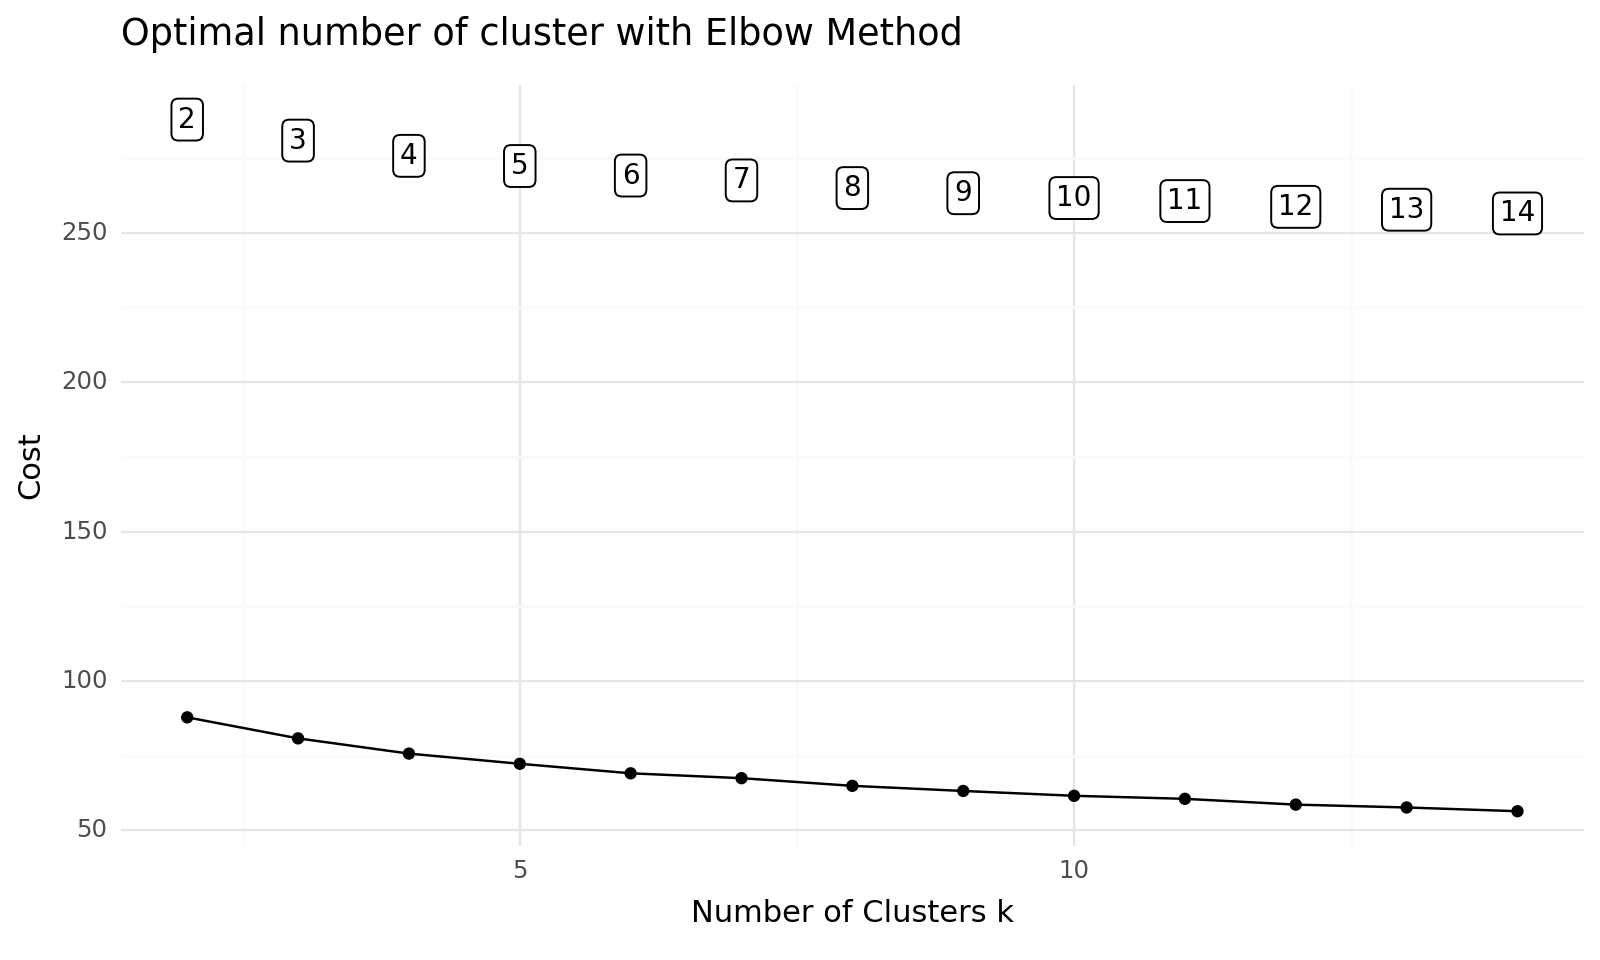

<Figure Size: (800 x 480)>

In [16]:
# Choose optimal K using Elbow method

cost = []
range_ = range(2, 15)

for cluster in range_:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(df_no_outliers, categorical = categorical_columns_index)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))

# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range_, 'Cost':cost})

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
     ggplot(data = df_cost)+
     geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
     geom_point(aes(x = 'Cluster',
                    y = 'Cost'))+
     geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
                nudge_y = 200) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
     xlab('Number of Clusters k')+
     ylab('Cost')+
     theme_minimal()
)


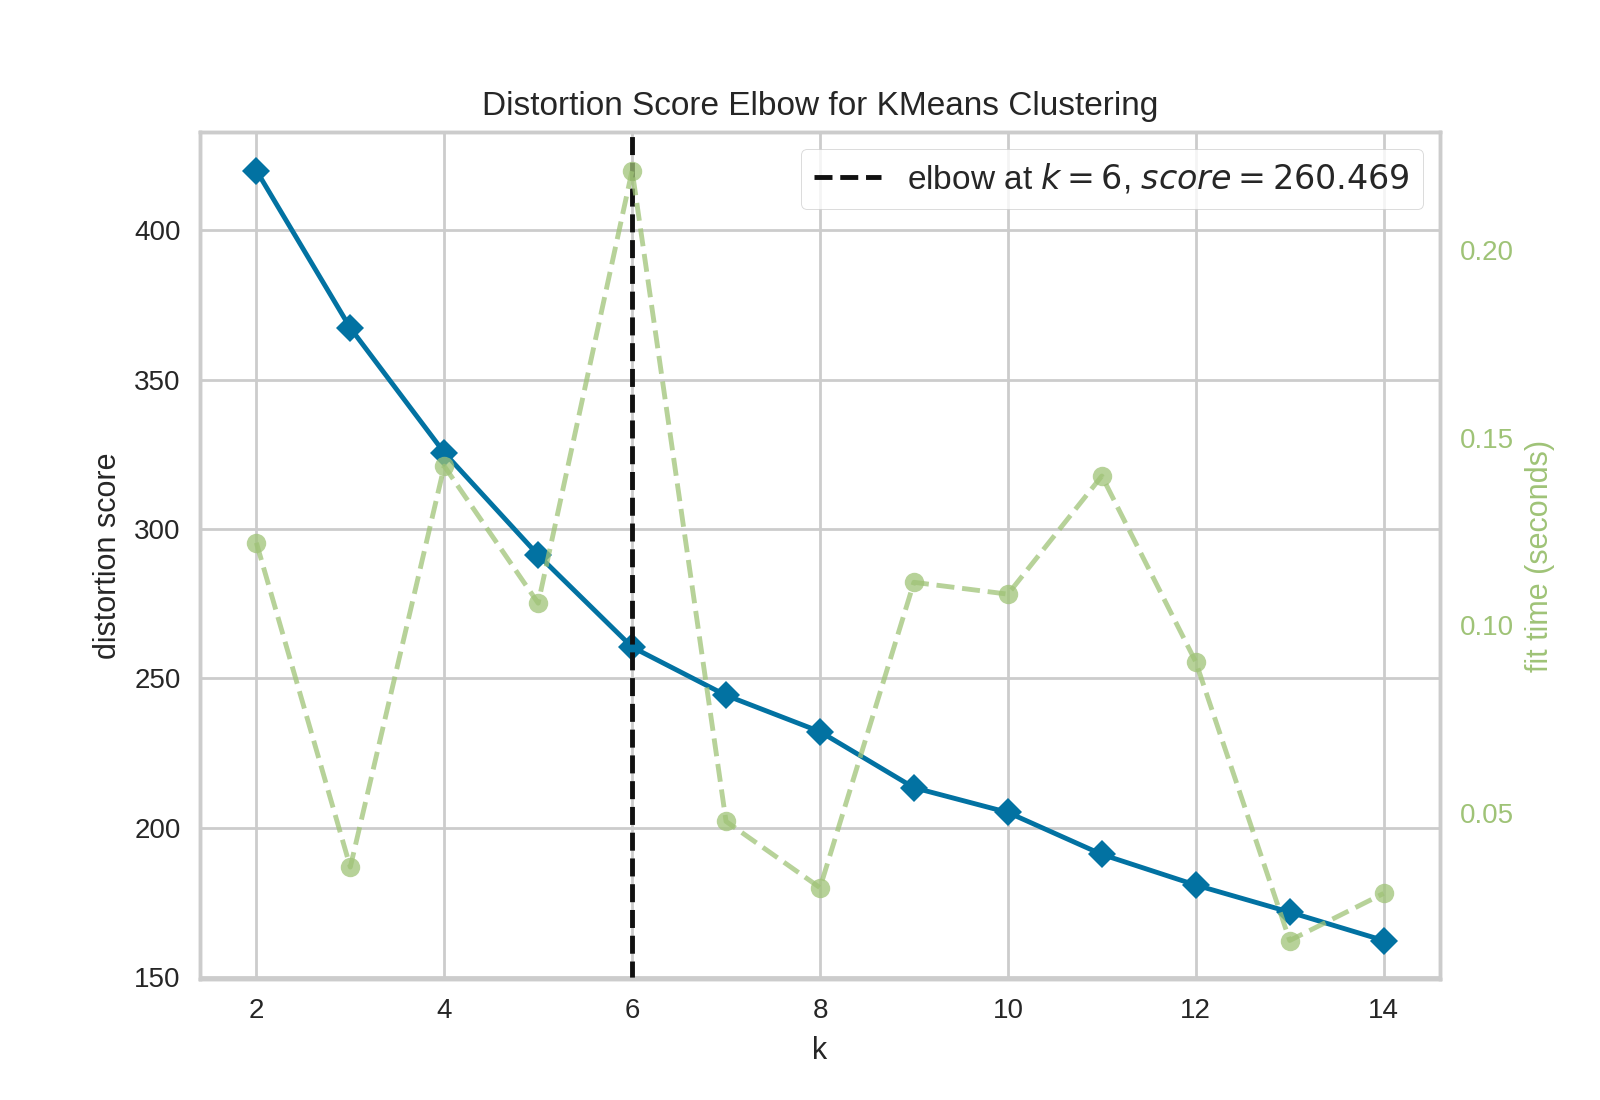

Elbow optimized K Value: 6


In [25]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,15))

visualizer.fit(df_no_outliers) # Fit the data to the visualizer visualizer.show()
visualizer.show()
print("Elbow optimized K Value:", visualizer.elbow_value_)

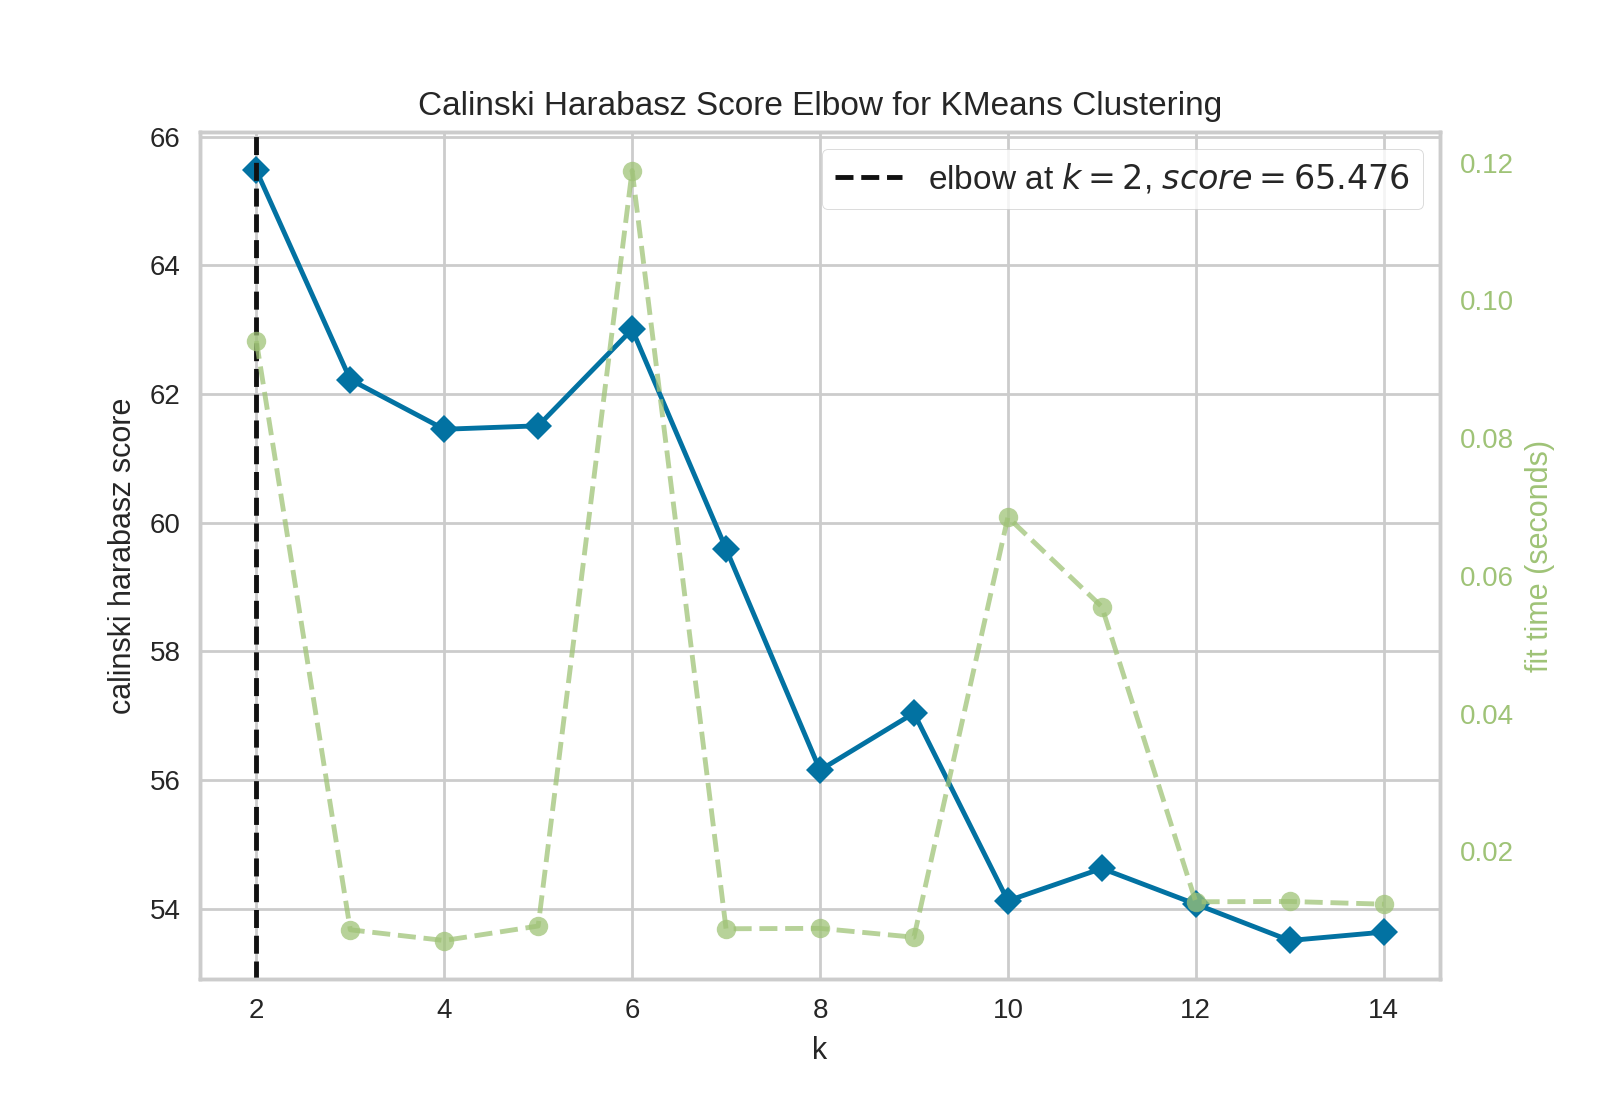

Value: 2


In [26]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,15), metric='calinski_harabasz')

visualizer.fit(df_no_outliers) # Fit the data to the visualizer visualizer.show()
visualizer.show()
print("Value:", visualizer.elbow_value_)

<h1> We are going to use k=6 and Kpropotype, This model allows us to use mixed dataframes (numeric and categorical variables)   </h1>

In [38]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import matplotlib.cm as cm

def make_Silhouette_plot(X, n_clusters):
  plt.xlim([-0.1, 1])
  plt.ylim([0, len(X) + (n_clusters + 1) * 10])
  clusterer = KMeans(n_clusters=n_clusters, max_iter = 1000, n_init ='auto', init='k-means++')
  cluster_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
    "For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg,
    )

# Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
      np.arange(y_lower, y_upper),
      0,
      ith_cluster_silhouette_values,
      facecolor=color, edgecolor=color,
      alpha=0.7,
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
    plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=12)
    plt.xlabel("The silhouette coefficient values", fontsize=12)
    plt.ylabel("Cluster label", fontsize=12)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


N cluster: 2
For n_clusters = 2 The average silhouette_score is : 0.14933480956499662


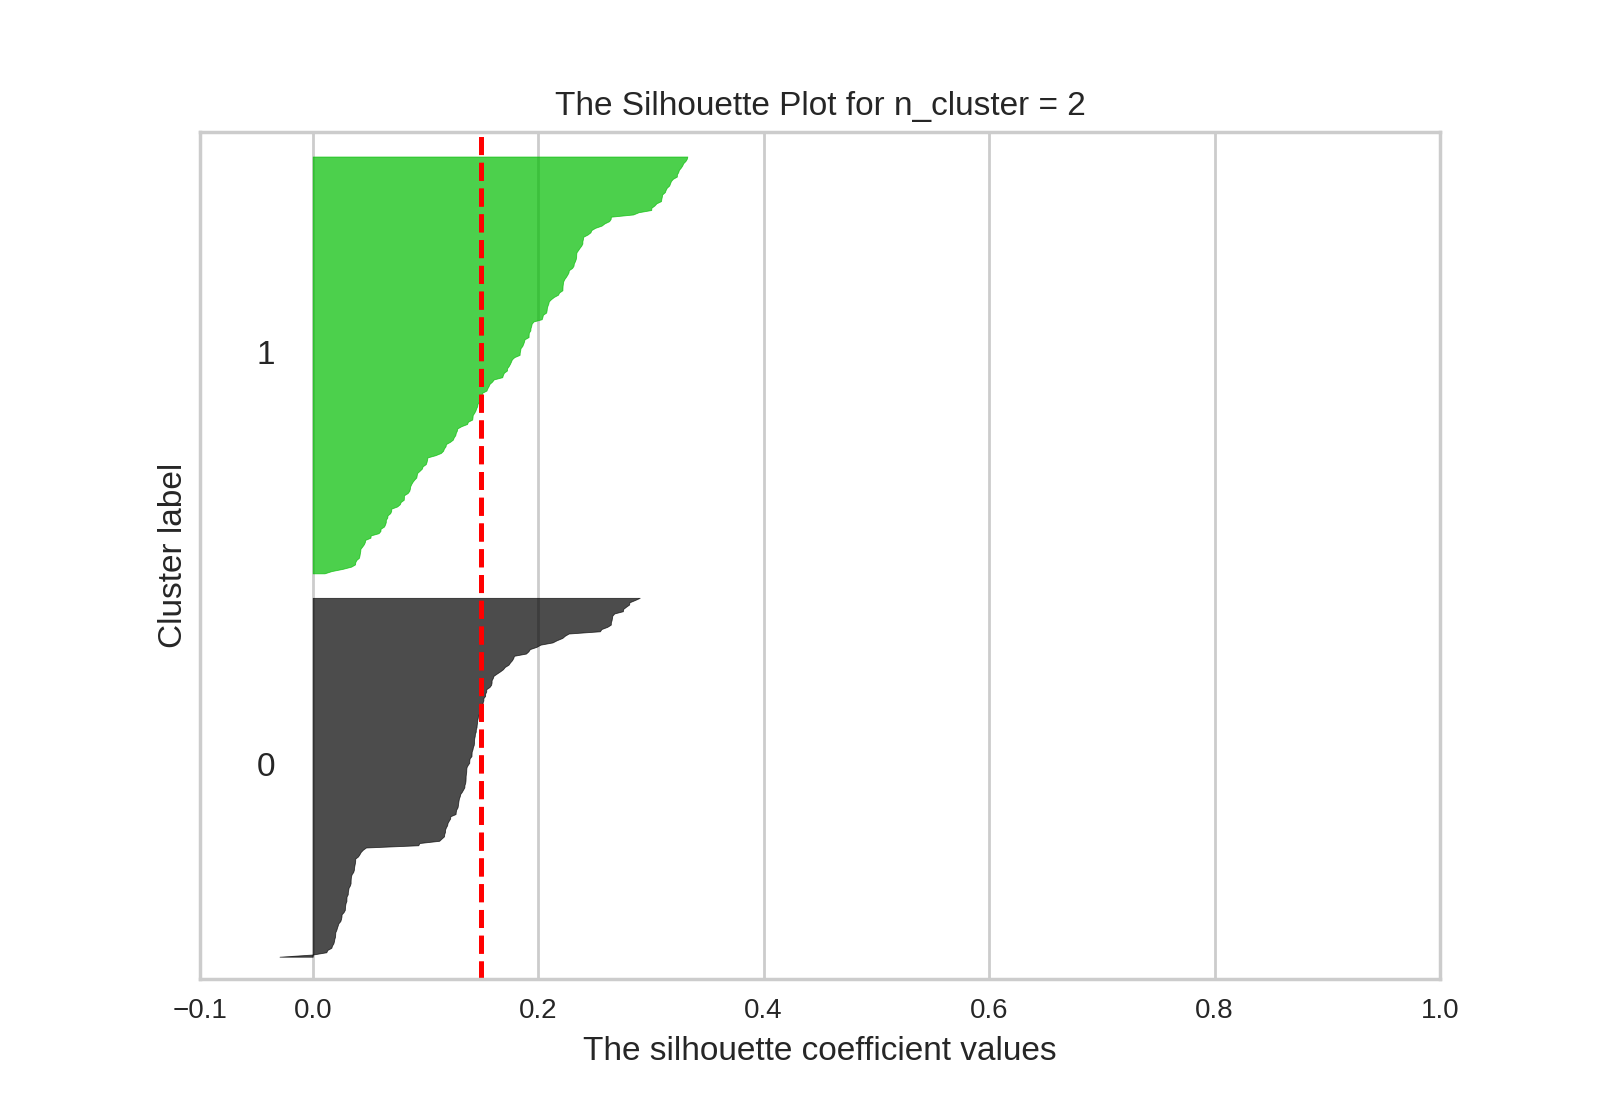

N cluster: 3
For n_clusters = 3 The average silhouette_score is : 0.17496905425332857


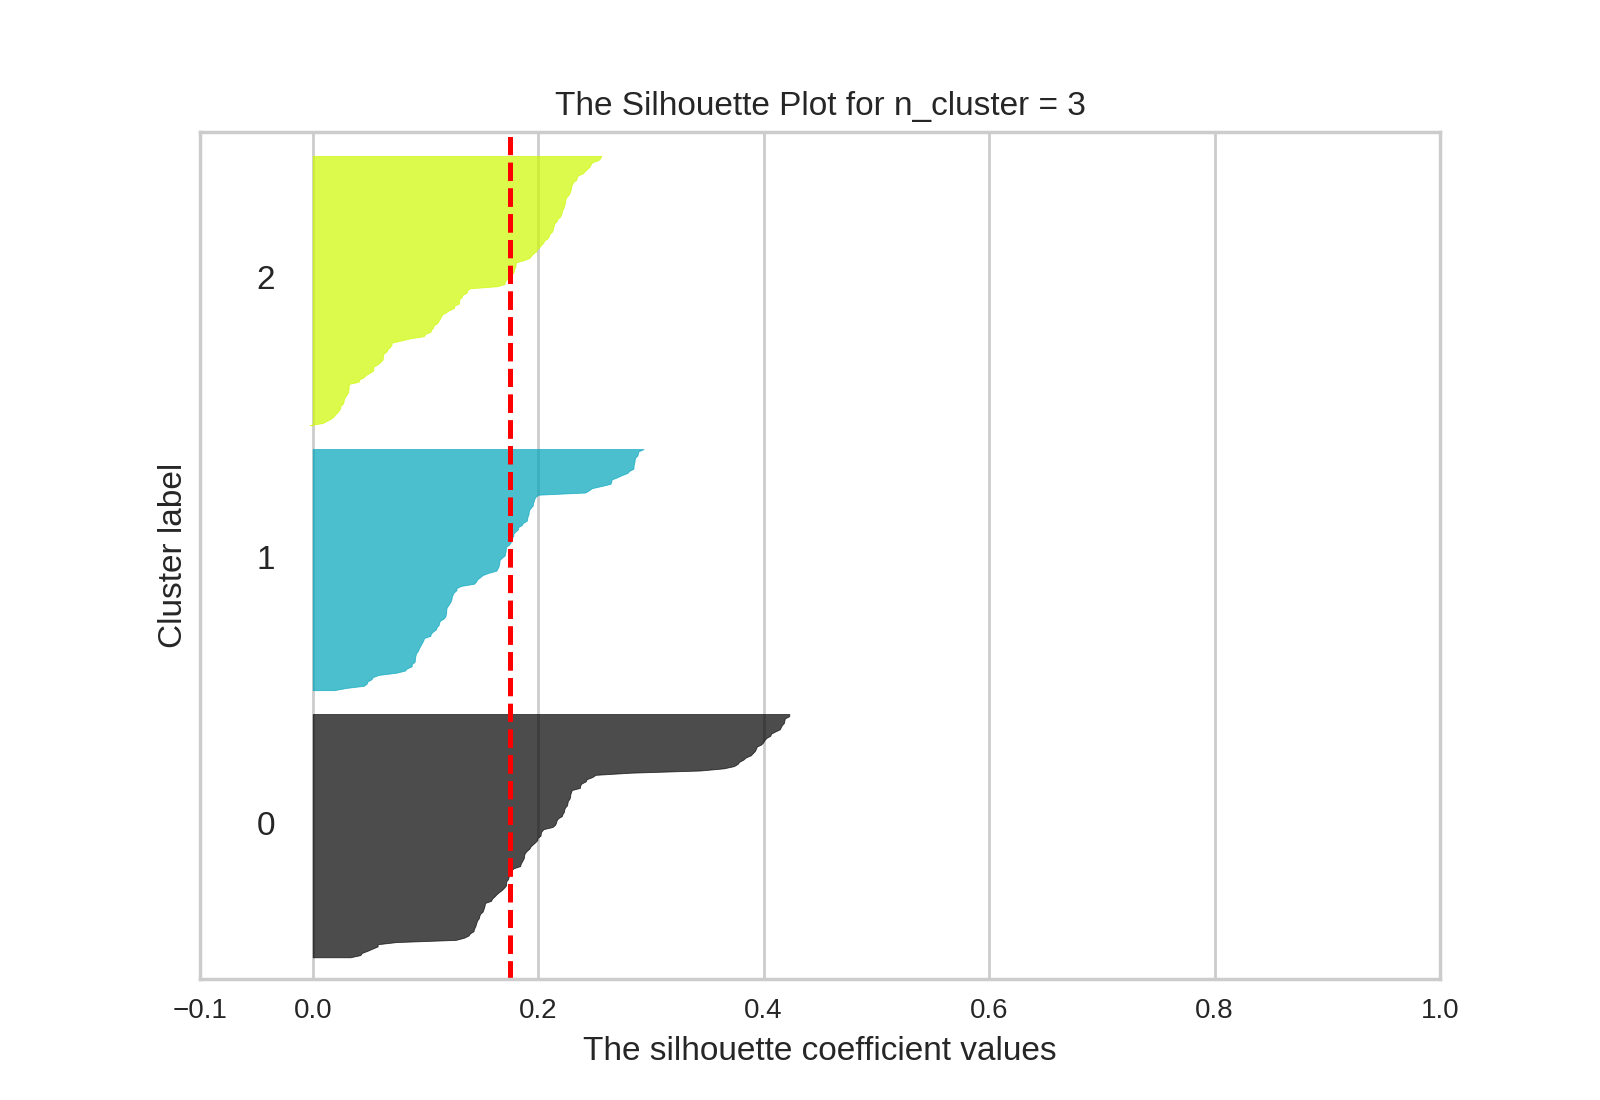

N cluster: 4
For n_clusters = 4 The average silhouette_score is : 0.18101140175193509


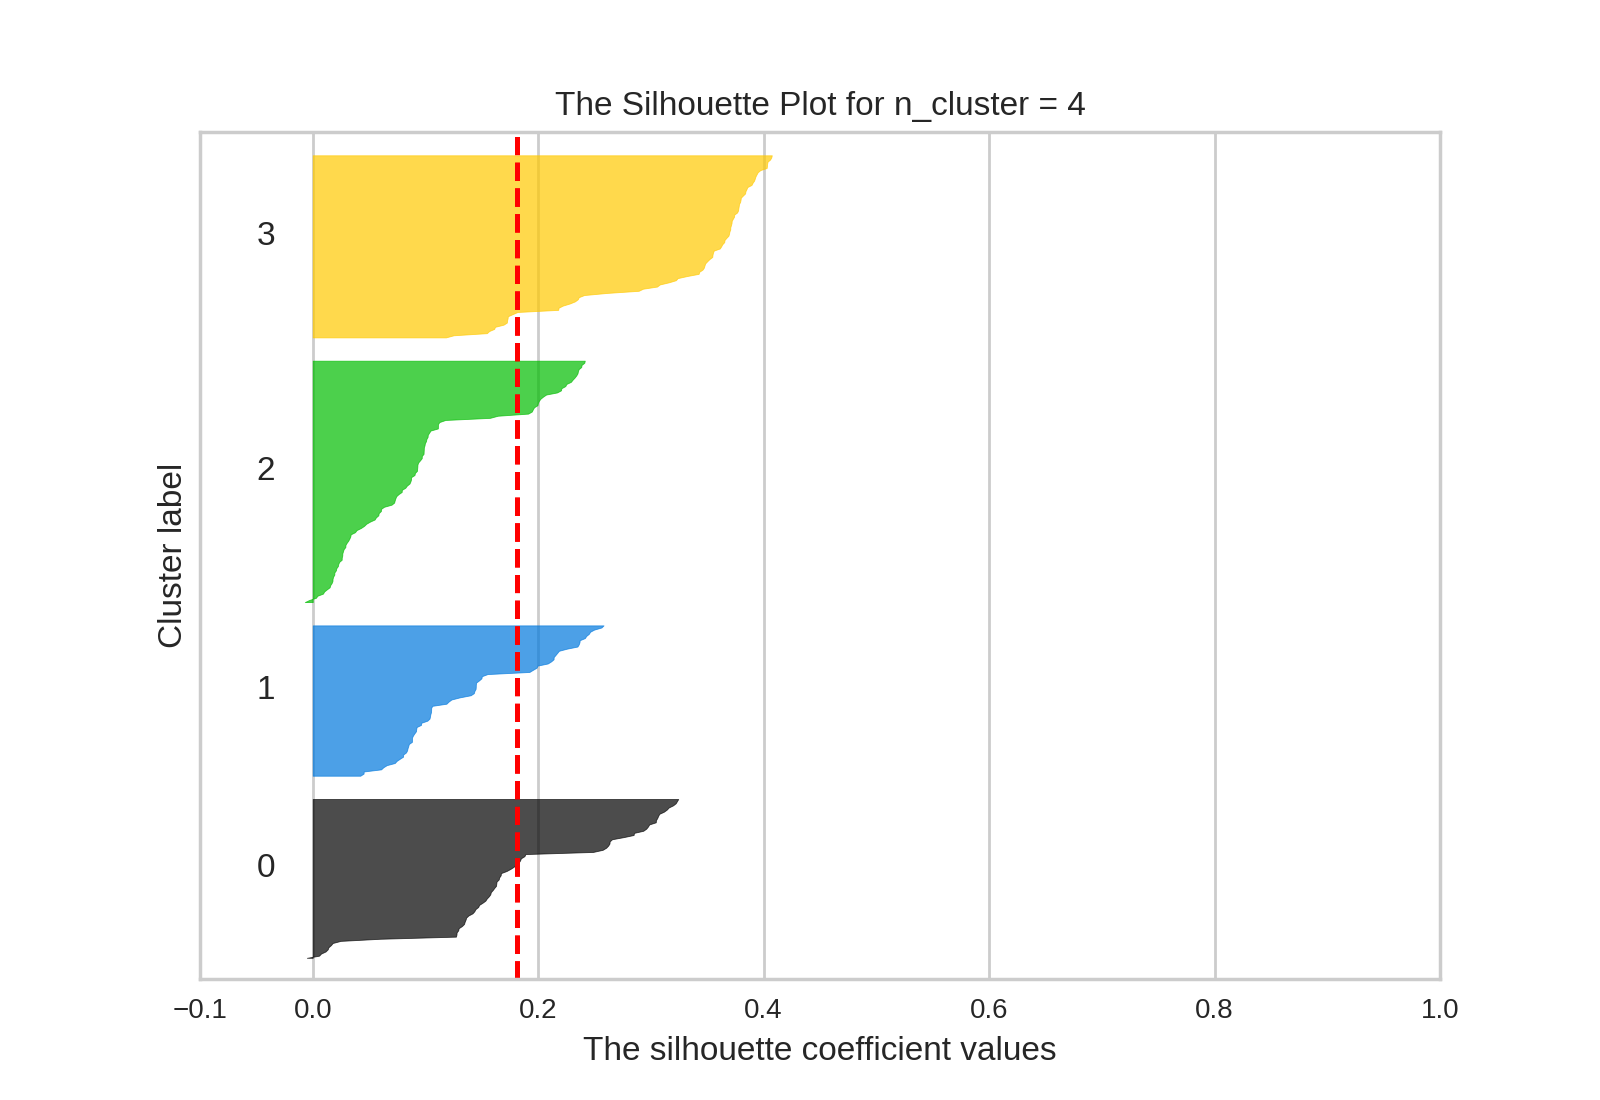

N cluster: 5
For n_clusters = 5 The average silhouette_score is : 0.18757596414042235


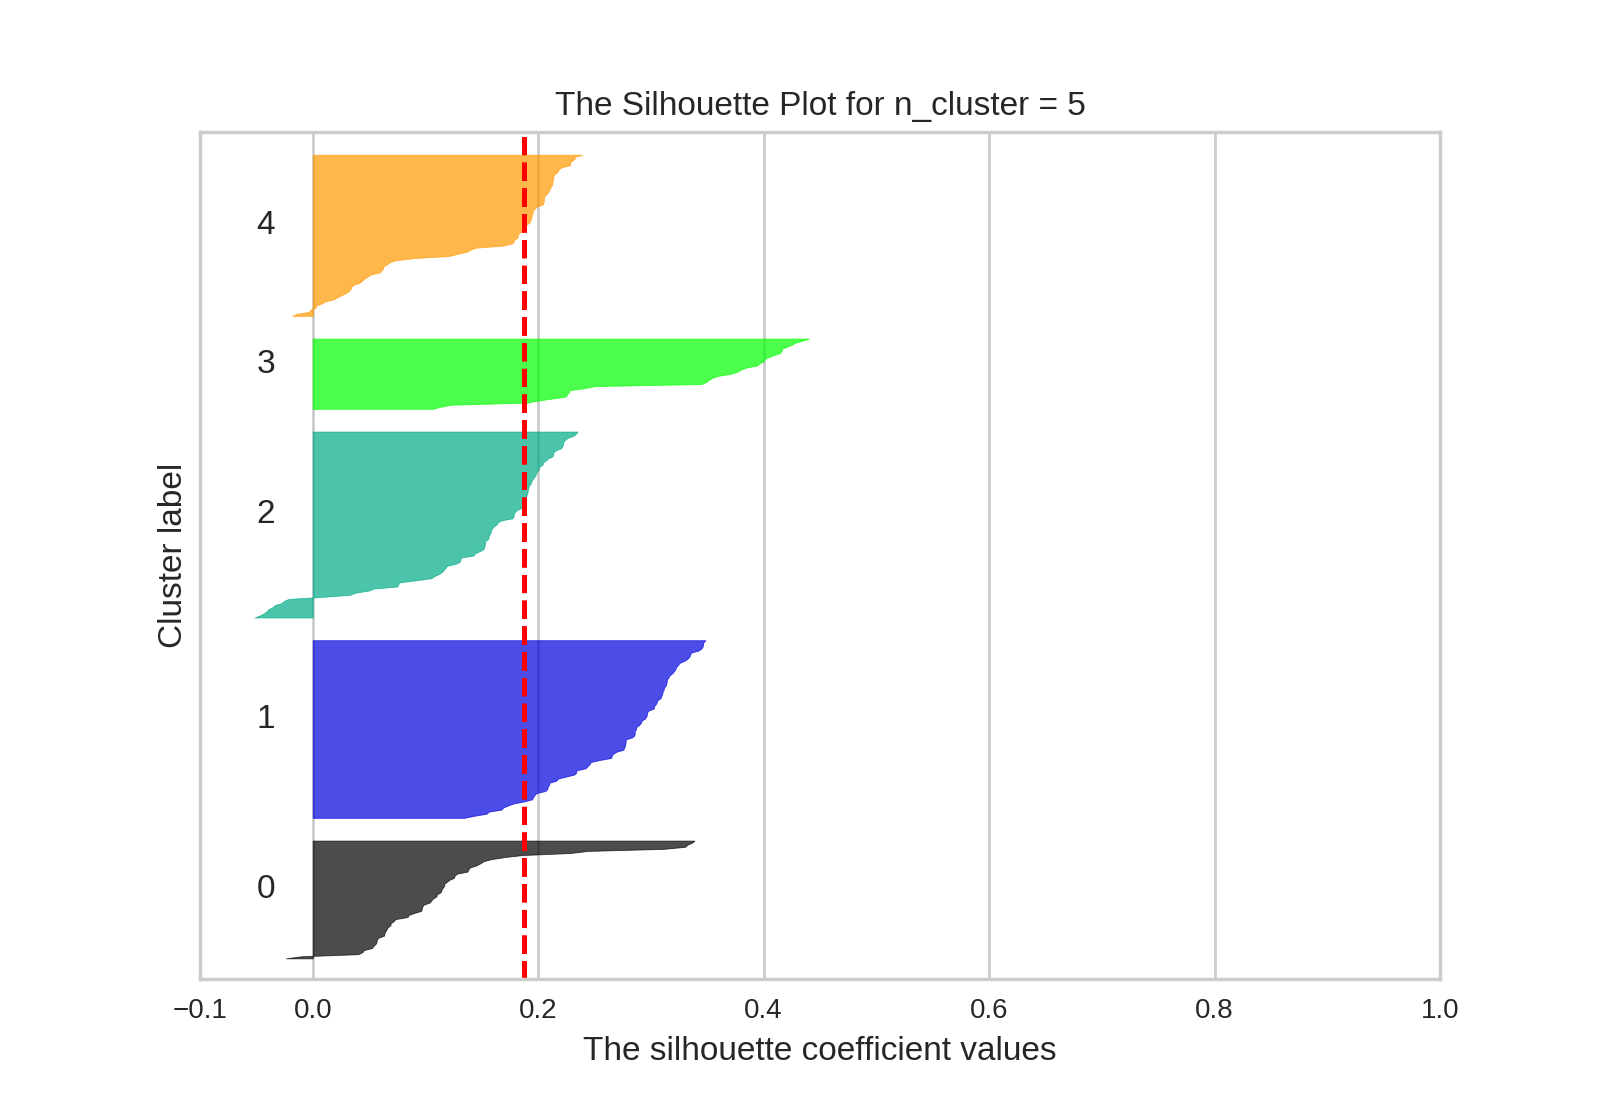

N cluster: 6
For n_clusters = 6 The average silhouette_score is : 0.18640012916746357


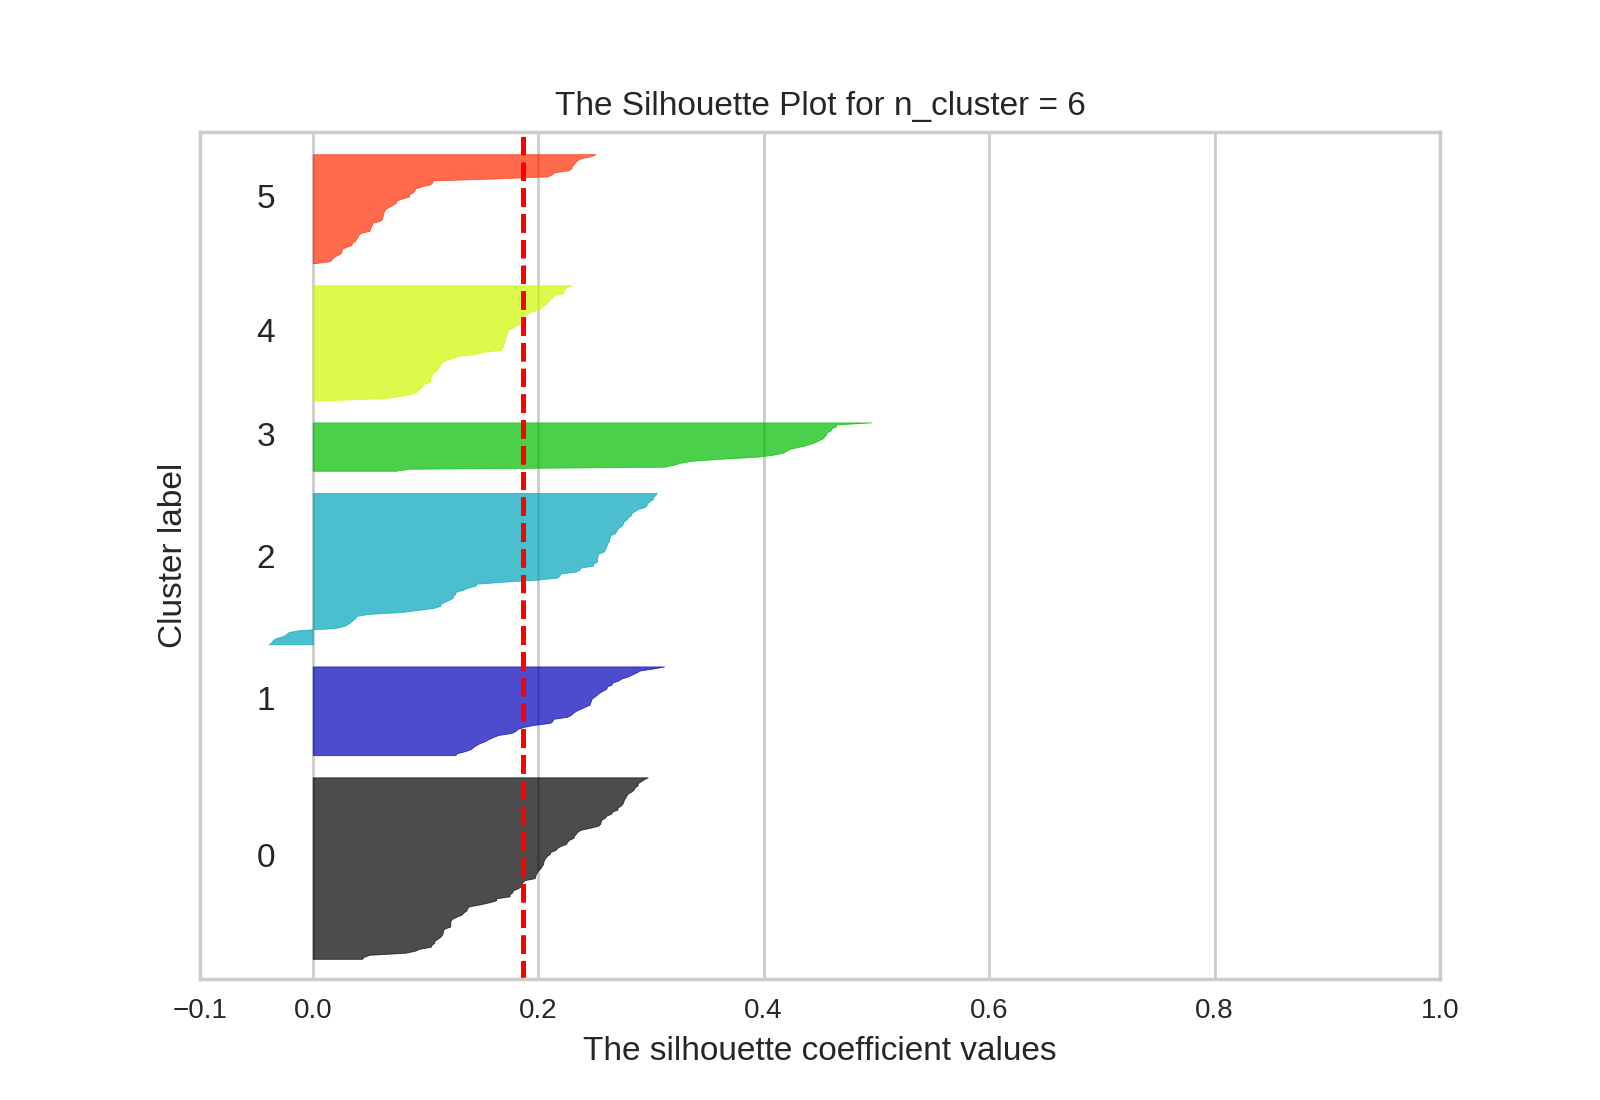

N cluster: 7
For n_clusters = 7 The average silhouette_score is : 0.20138251219902234


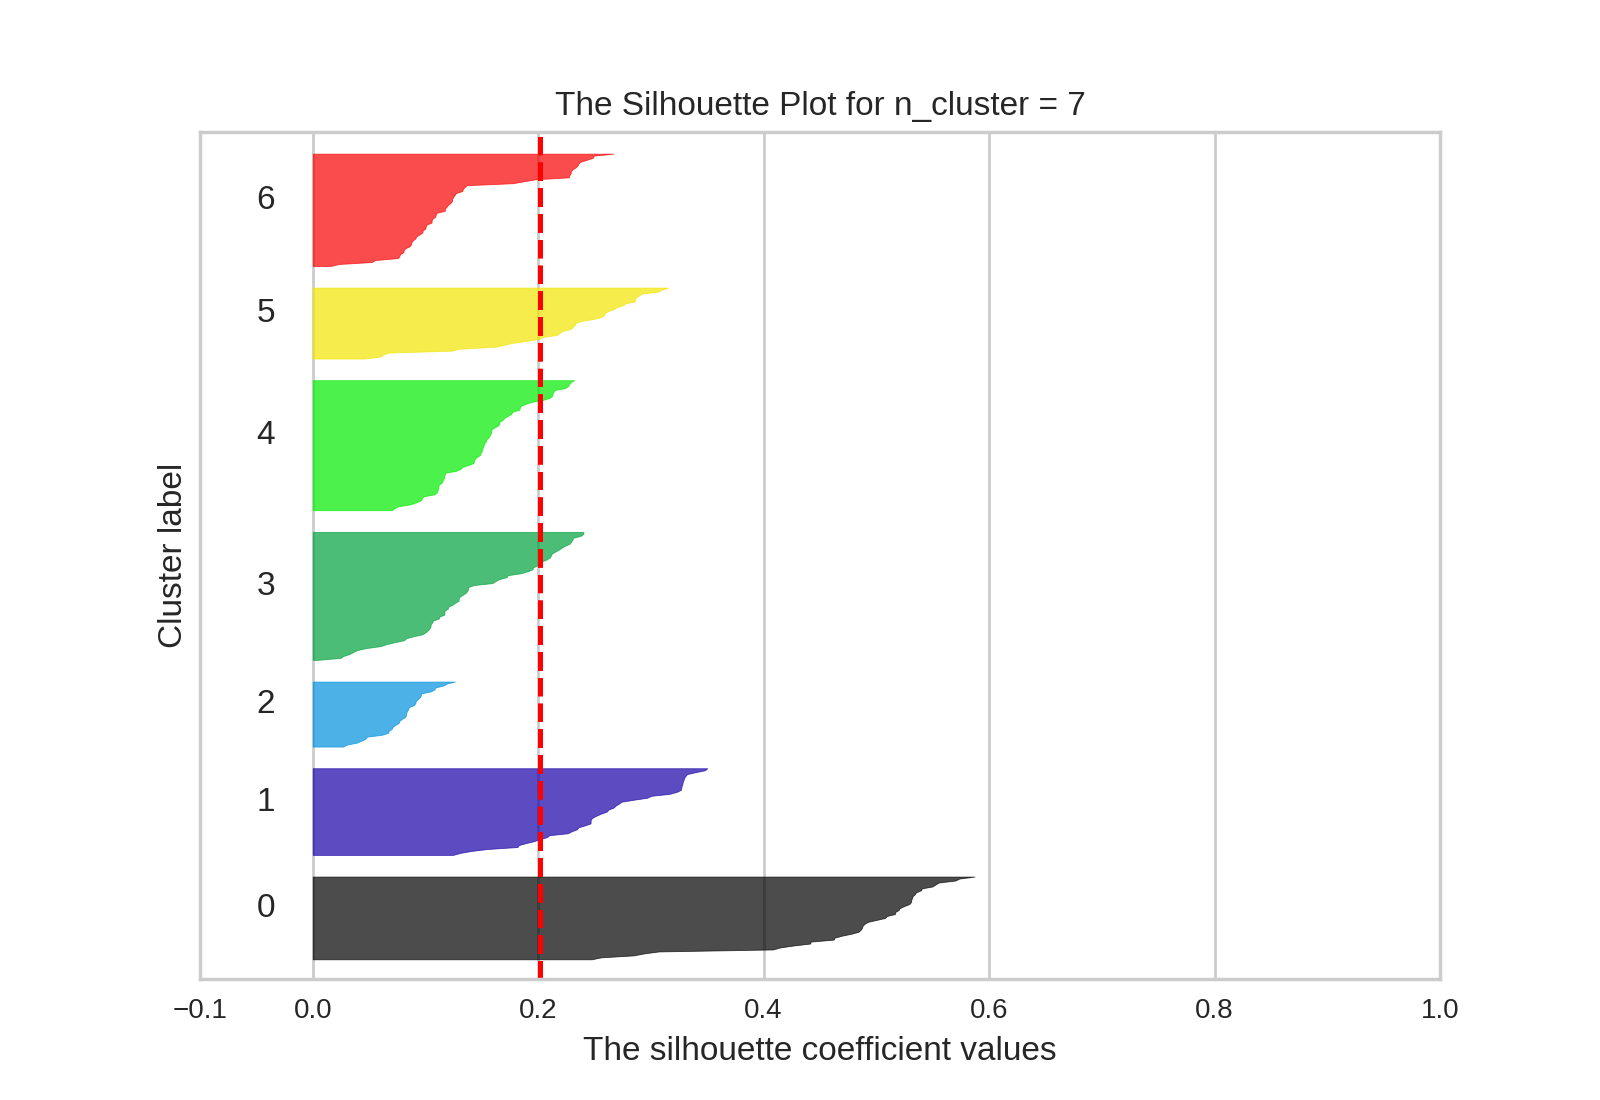

N cluster: 8
For n_clusters = 8 The average silhouette_score is : 0.23936540312768456


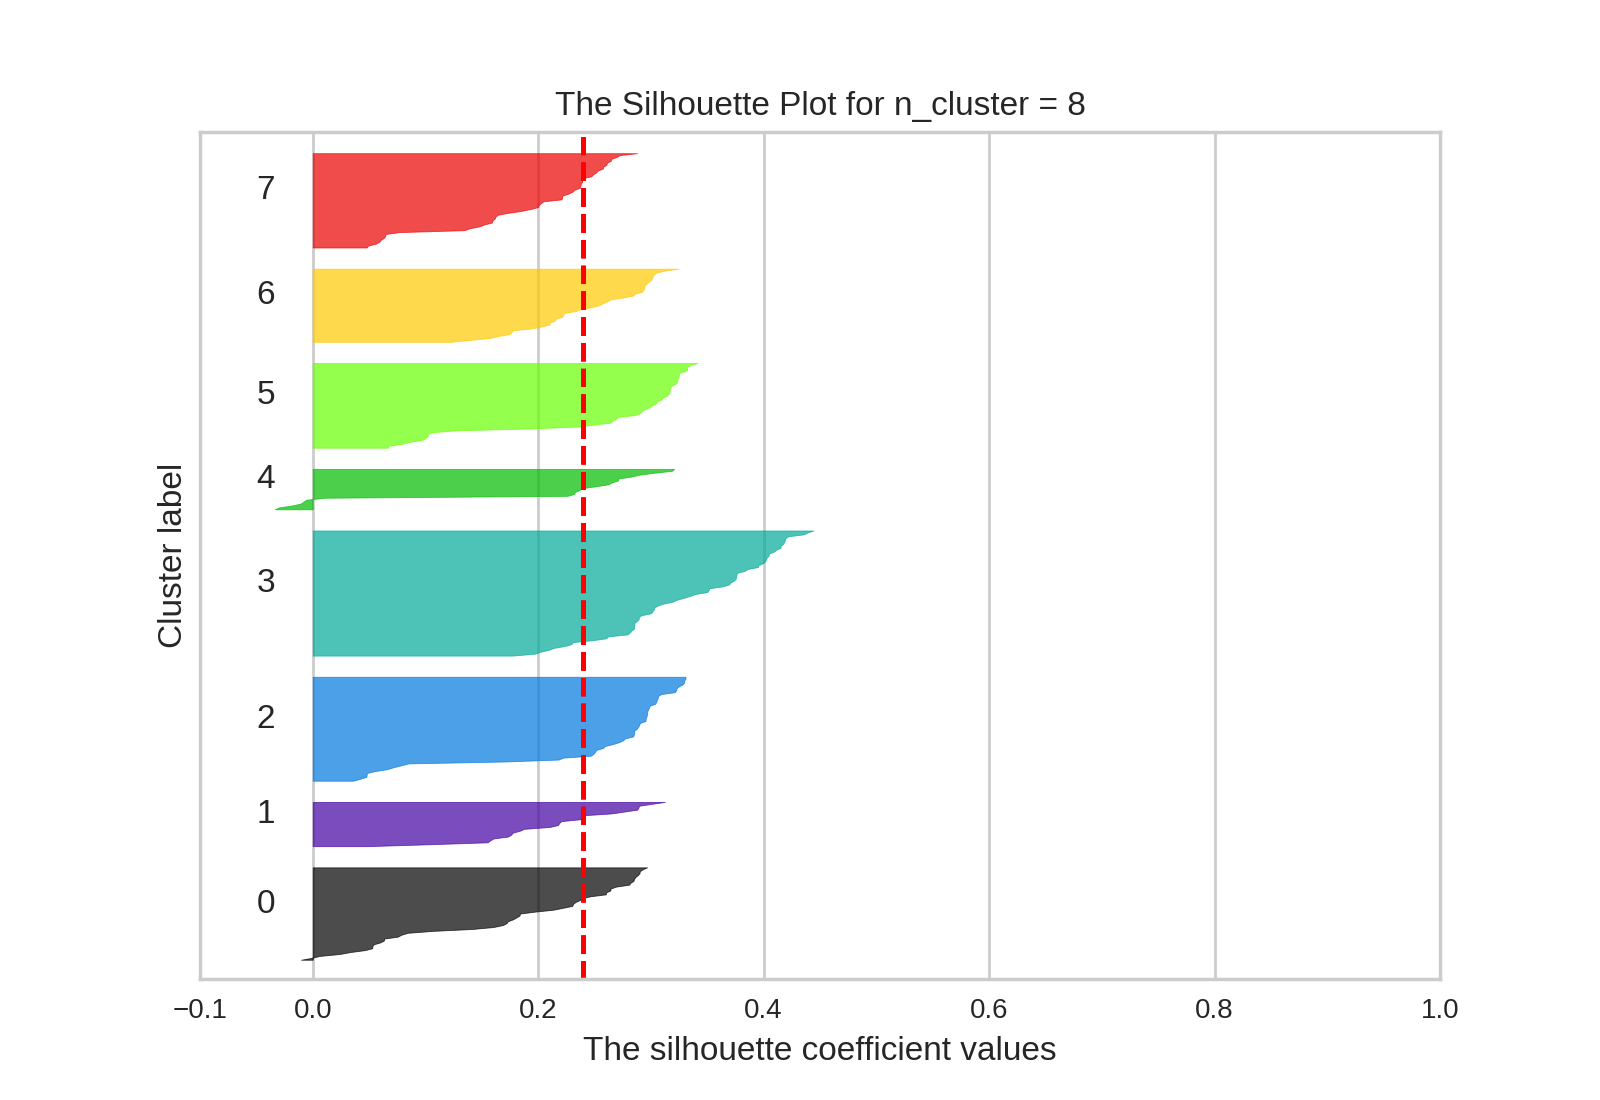

N cluster: 9
For n_clusters = 9 The average silhouette_score is : 0.2497255670117975


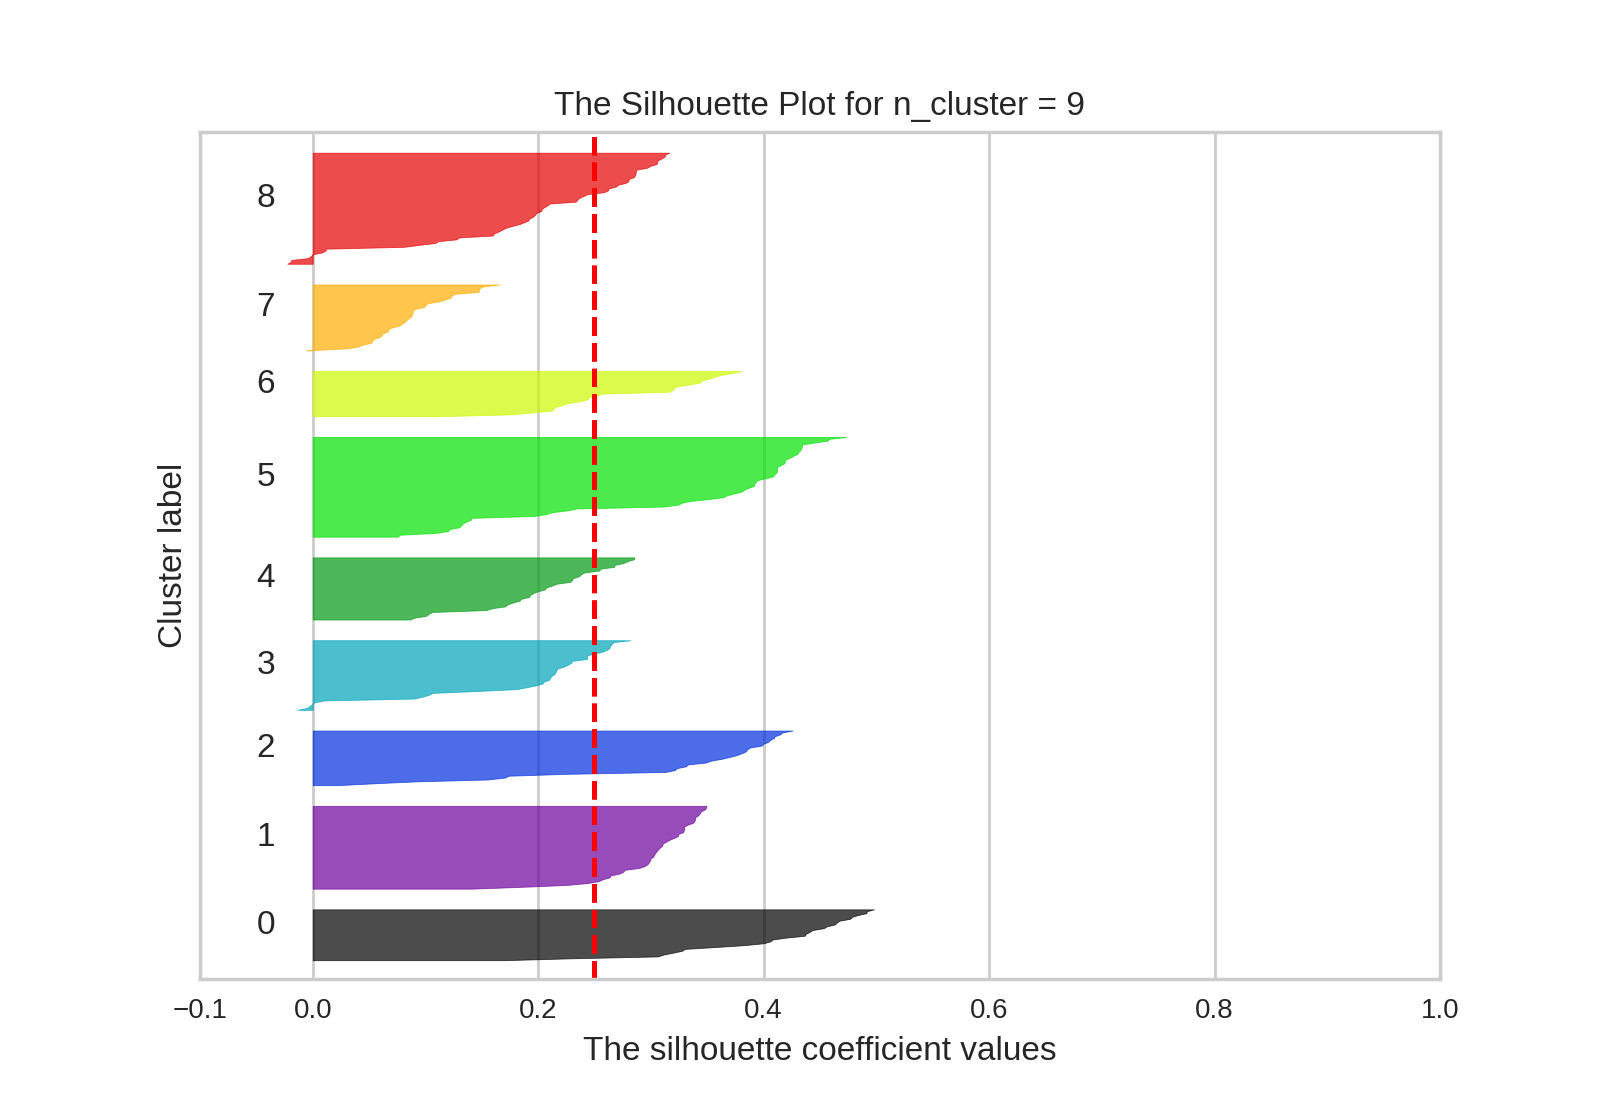

N cluster: 10
For n_clusters = 10 The average silhouette_score is : 0.2678853998136382


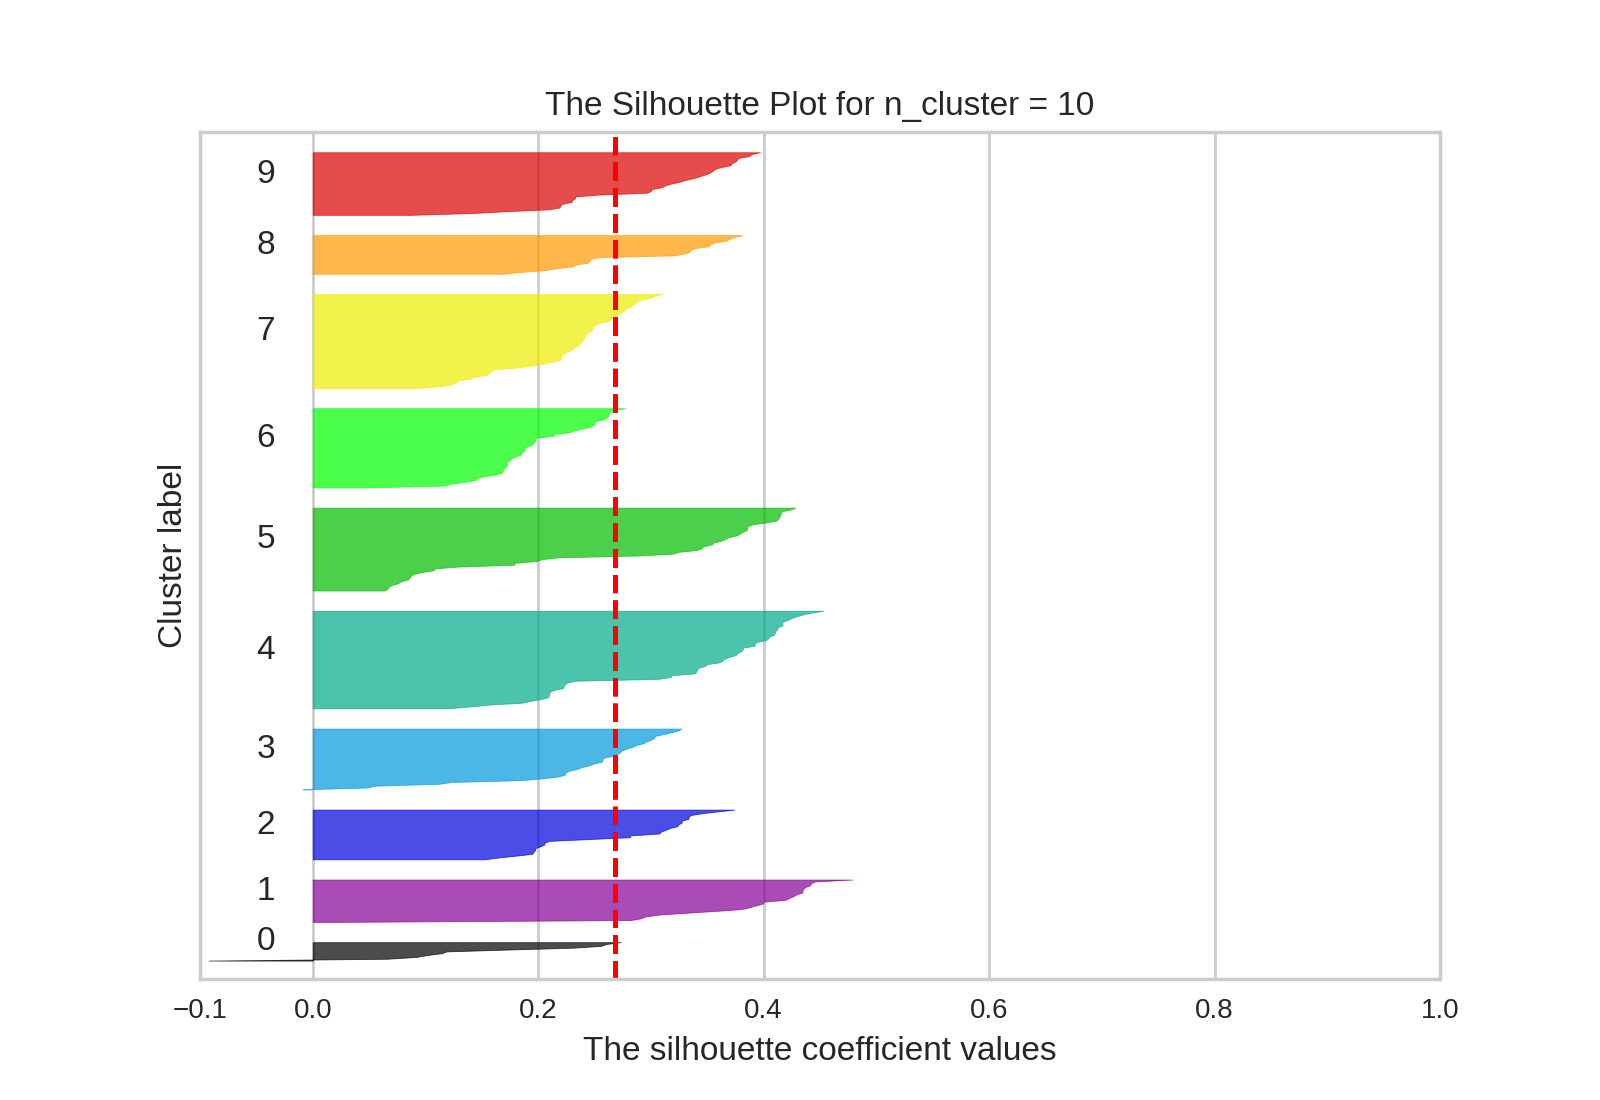

In [39]:

range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
  print(f"N cluster: {n_clusters}")
  make_Silhouette_plot(df_no_outliers, n_clusters)
  plt.show()
  plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
  plt.close()


In [41]:
km = KMeans(n_clusters=6, init='k-means++',
  n_init=10, max_iter=500, random_state=42)
clusters_predict = km.fit_predict(df_no_outliers)


In [43]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity
is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller
value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(df_no_outliers,clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the
sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(df_no_outliers,clusters_predict)}")

"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as
a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very
dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(df_no_outliers,clusters_predict)}")


Davies bouldin score: 1.515602369173572
Calinski Score: 59.71188228370878
Silhouette Score: 0.2049869911097005


In [45]:
num_clusters = 5
km = KMeans(n_clusters=5, init='k-means++',
  n_init=10, max_iter=100, random_state=42)
clusters_predict = km.fit_predict(df_no_outliers)
print(f"Num of clusters: {num_clusters}")
print(f"Davies bouldin score: {davies_bouldin_score(df_no_outliers,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(df_no_outliers,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(df_no_outliers,clusters_predict)}")


Num of clusters: 5
Davies bouldin score: 1.6177214822503927
Calinski Score: 63.382150165887445
Silhouette Score: 0.2053159395816007


In [46]:
num_clusters = 7
km = KMeans(n_clusters=7, init='k-means++',
  n_init=10, max_iter=100, random_state=42)
clusters_predict = km.fit_predict(df_no_outliers)
print(f"Num of clusters: {num_clusters}")
print(f"Davies bouldin score: {davies_bouldin_score(df_no_outliers,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(df_no_outliers,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(df_no_outliers,clusters_predict)}")


Num of clusters: 7
Davies bouldin score: 1.4179127157186362
Calinski Score: 60.454119902256885
Silhouette Score: 0.20606597673815194


In [ ]:
# https://github.com/MaxHalford/prince

In [50]:
df_no_outliers_norm

,AgeAtVisit,bmi_mean,bmi_var,Ab40_mean,Ab40_var,Ab42_mean,Ab42_var,Ab40_Ab42_ratio_mean,Ab40_Ab42_ratio_var,GFAP_mean,...,s_bp_adj_var,d_bp_adj_mean,d_bp_adj_var,gender,carrier,race,final_bmi_cat,final_htn_cat,final_diab_cat,final_highchol_cat
0,0.607200,0.363945,0.000000,0.389494,0.000000,0.358386,0.000000,0.041749,0.000000e+00,0.225000,...,0.000000,0.728814,0.000000,1,1,4,1,0,0,1
1,0.630137,0.341039,0.000065,0.296735,0.000028,0.283925,0.001246,0.043660,7.346802e-05,0.164679,...,0.002208,0.728814,0.000287,1,0,4,1,1,0,1
2,0.730487,0.292400,0.000103,0.452595,0.000500,0.476688,0.000830,0.031189,5.026498e-06,0.594231,...,0.025554,0.451977,0.032845,2,1,4,0,0,0,0
3,0.546352,0.342100,0.000000,0.322291,0.000000,0.409186,0.000000,0.024385,0.000000e+00,0.139423,...,0.000000,0.542373,0.000000,2,1,4,1,0,0,1
4,0.612297,0.475292,0.000137,0.460483,0.000045,0.499652,0.000004,0.029153,8.951379e-07,0.328846,...,0.000068,0.567797,0.007038,2,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.570882,0.451750,0.000000,0.178419,0.000000,0.299235,0.000000,0.019191,0.000000e+00,0.099231,...,0.000000,0.372881,0.000000,1,0,4,1,0,0,1
383,0.386429,0.388759,0.000000,0.292475,0.000000,0.436326,0.000000,0.017395,0.000000e+00,0.136923,...,0.000000,0.576271,0.000000,2,0,4,1,0,0,1
384,0.484549,0.587169,0.001676,0.294605,0.002102,0.413709,0.001749,0.020241,5.309655e-07,0.091731,...,0.000608,0.483051,0.003591,2,0,3,1,1,1,1
385,0.352342,0.615058,0.000169,0.328285,0.002455,0.563210,0.003969,0.009864,3.051967e-06,0.143846,...,0.001217,0.327684,0.004692,2,0,4,1,1,0,1


In [51]:
cluster_num = 6
kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster_num, init = 'Huang', random_state = 0)
kprototype.fit(df_no_outliers_norm, categorical = categorical_columns_index)

clusters = kprototype.predict(df_no_outliers_norm , categorical = categorical_columns_index)

In [52]:
clusters

array([0, 0, 4, 0, 2, 4, 2, 1, 1, 3, 3, 2, 3, 1, 3, 2, 1, 0, 4, 2, 4, 4,
       1, 5, 1, 2, 4, 4, 5, 1, 0, 0, 1, 4, 5, 0, 0, 5, 3, 0, 1, 5, 2, 0,
       4, 5, 3, 4, 0, 1, 3, 5, 1, 0, 3, 0, 2, 0, 2, 5, 2, 4, 0, 4, 1, 4,
       4, 4, 4, 4, 1, 3, 4, 0, 0, 2, 4, 1, 3, 0, 0, 5, 0, 4, 4, 3, 4, 4,
       1, 5, 4, 3, 2, 5, 1, 1, 3, 0, 0, 4, 0, 2, 5, 0, 1, 2, 2, 4, 3, 0,
       5, 2, 0, 3, 4, 4, 4, 4, 4, 1, 0, 4, 5, 3, 5, 3, 1, 3, 2, 1, 3, 4,
       0, 3, 2, 2, 4, 0, 2, 0, 0, 0, 2, 2, 1, 5, 4, 2, 4, 3, 4, 0, 5, 4,
       5, 0, 1, 0, 1, 2, 4, 1, 0, 3, 1, 3, 0, 5, 4, 0, 4, 4, 3, 0, 2, 0,
       5, 2, 1, 3, 3, 1, 4, 1, 1, 4, 4, 5, 4, 0, 5, 5, 5, 4, 3, 5, 2, 5,
       4, 1, 3, 3, 5, 5, 5, 0, 0, 4, 1, 4, 3, 1, 3, 1, 4, 5, 4, 2, 2, 2,
       4, 5, 5, 2, 2, 3, 5, 3, 2, 3, 1, 1, 1, 4, 5, 2, 2, 1, 2, 4, 3, 5,
       0, 3, 4, 2, 0, 5, 1, 4, 3, 4, 4, 4, 4, 3, 0, 1, 0, 0, 4, 3, 3, 0,
       3, 1, 3, 1, 2, 3, 0, 5, 1, 4, 5, 0, 4, 4, 2, 4, 0, 5, 1, 4, 4, 3,
       5, 2, 0, 4, 3, 4, 3, 4, 4, 3, 3, 2, 0, 3, 4,

In [53]:
# Cluster centorid
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
print(kprototype.cost_)

[[5.06508772e-01 3.84331615e-01 3.59784027e-04 3.45933221e-01
  3.35320086e-03 4.16910630e-01 2.80329693e-03 3.68205704e-02
  7.62101685e-03 1.89421972e-01 1.18373249e-03 1.79074442e-01
  1.37452221e-03 1.34415610e-01 1.73266893e-03 1.46259236e-01
  1.12079045e-03 1.50354116e-01 1.55365073e-03 3.79964328e-01
  4.46095918e-03 1.17254547e-01 3.18069341e-03 3.58941513e-01
  4.51934683e-03 3.57623075e-01 4.59320002e-03 2.41936867e-01
  1.94536837e-03 5.20983694e-01 6.97021689e-03 5.88447302e-01
  3.62394212e-03 1.00000000e+00 1.00000000e+00 4.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [7.65129022e-01 4.00851184e-01 1.96498094e-04 4.44112636e-01
  4.19179507e-03 5.18585015e-01 1.75457356e-03 2.67010356e-02
  2.02048380e-05 2.26438462e-01 1.37326183e-03 2.17761760e-01
  1.05215095e-03 1.59576174e-01 1.71337136e-03 1.92505952e-01
  2.42279974e-03 1.70516274e-01 6.38370234e-04 2.34241379e-01
  4.00376536e-03 1.11361186e-01 8.82676673e-04 2.32222222e-01
  4.375

In [73]:
from prince import MCA

def get_MCA_3d(df, predict):

    mca = MCA(n_components =15, n_iter = 100, random_state = 101)

    mca_3d_df = mca.fit_transform(df)
    mca_3d_df.columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6","pc7", "pc8", "pc9", "pc10", "pc11", "pc12", "pc13", "pc14", "pc15"]
    mca_3d_df["cluster"] = predict

    return mca, mca_3d_df



def get_MCA_2d(df, predict):

    mca = MCA(n_components =2, n_iter = 100, random_state = 101)

    mca_2d_df = mca.fit_transform(df)
    mca_2d_df.columns = ["pc1", "pc2"]
    mca_2d_df["cluster"] = predict

    return mca, mca_2d_df

mca_3d, mca_3d_df = get_MCA_3d(df_no_outliers_norm, clusters)

In [74]:
mca_3d_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,cluster
0,-0.041887,-0.029999,-0.015401,-0.024116,0.000028,-0.094841,-0.114777,-0.012656,-0.039345,-0.042529,0.108270,0.002284,-0.055383,0.001159,0.100656,0
1,0.026808,-0.328593,-1.424786,-2.083846,-1.539367,-0.348137,2.396942,-0.461290,1.295542,-0.491219,3.767076,-4.840626,-2.607105,0.315899,0.601877,0
2,-0.106716,-0.030870,-0.078779,0.028604,0.119970,0.028736,-0.240177,-0.270268,0.475772,-0.400019,1.243057,-1.080290,4.143379,5.734253,-3.042298,4
3,-0.040516,-0.031493,0.005058,0.024437,0.017141,-0.052895,-0.139678,0.082258,-0.031333,-0.027857,0.045684,0.086236,-0.028569,0.085149,0.033766,0
4,-0.045999,-0.051420,-0.024830,-0.097454,0.005891,-0.112879,-0.198974,-0.014909,-0.073975,-0.061811,0.043986,-0.053605,0.021802,0.266685,-0.023725,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,-0.039015,-0.015530,0.014516,0.005430,0.027998,-0.094418,-0.150517,-0.006246,-0.052936,-0.036403,0.034905,0.073645,-0.026463,0.016830,0.099287,5
383,-0.033858,-0.016870,0.010955,0.002019,0.025277,-0.079445,-0.148985,0.005127,-0.053501,-0.024679,0.028047,0.044952,0.027552,0.024808,0.071997,5
384,-0.030906,-0.021563,-0.057683,-0.122888,-0.003688,-0.137788,-0.224134,-0.080119,0.078572,-0.024943,-0.029011,0.111393,-0.189251,0.046117,0.162662,2
385,16.835377,0.189251,0.156057,0.224797,0.141158,0.092122,0.014610,-0.016929,-0.011874,-0.018308,0.038357,0.012747,0.045324,-0.002743,-0.015407,5


In [75]:
mca_3d.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.813,0.51%,0.51%
1,0.789,0.50%,1.01%
2,0.781,0.49%,1.50%
3,0.780,0.49%,1.99%
4,0.780,0.49%,2.48%
5,0.779,0.49%,2.97%
6,0.777,0.49%,3.45%
7,0.772,0.49%,3.94%
8,0.771,0.48%,4.42%


In [76]:
def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["pc1", "pc2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=15,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6","pc7", "pc8", "pc9", "pc10", "pc11", "pc12", "pc13", "pc14", "pc15"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    fig = px.scatter_3d(df,
                        x='pc1',
                        y='pc2',
                        z='pc3',
                        color='cluster',
                        template="plotly",

                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000,
                                height = 800,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'pc1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'pc2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'pc3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    fig = px.scatter(df,
                        x='pc1',
                        y='pc2',
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800,
                                height = 700,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()




In [77]:
plot_pca_3d(mca_3d_df, title="MCA Space", opacity=1, width_line = 0.1)

In [78]:
mca_2d, mca_2d_df = get_MCA_2d(df_no_outliers_norm, clusters)

In [79]:
plot_pca_2d(mca_3d_df, title="MCA Space", opacity=1, width_line = 0.5)

<h1> We can obtain the components of the PCA analysis and represent the identified clusters by the kprototype algorithm
</h1>

In [80]:
pca_3d_object, df_pca_3d = get_pca_3d(df_no_outliers, clusters)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              4.039        10.10%                     10.10%
1              3.379         8.45%                     18.55%
2              3.167         7.92%                     26.46%
3              2.407         6.02%                     32.48%
4              2.290         5.72%                     38.21%
5              2.033         5.08%                     43.29%
6              1.830         4.57%                     47.86%
7              1.691         4.23%                     52.09%
8              1.561         3.90%                     55.99%
9              1.334         3.33%                     59.33%
10             1.286         3.21%                     62.54%
11             1.156         2.89%                     65.43%
12             1.053         2.63%                     68.06%
13             0.998         2.50%               

In [81]:
pca_2d_object, df_pca_2d = get_pca_2d(df_no_outliers, clusters)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)


<h1> Features importance </h1>

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2665
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 40
[LightGBM] [Info] Start training from score -1.797490
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.986732
[LightGBM] [Info] Start training from score -1.668278
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Info] Start training from score -1.887641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

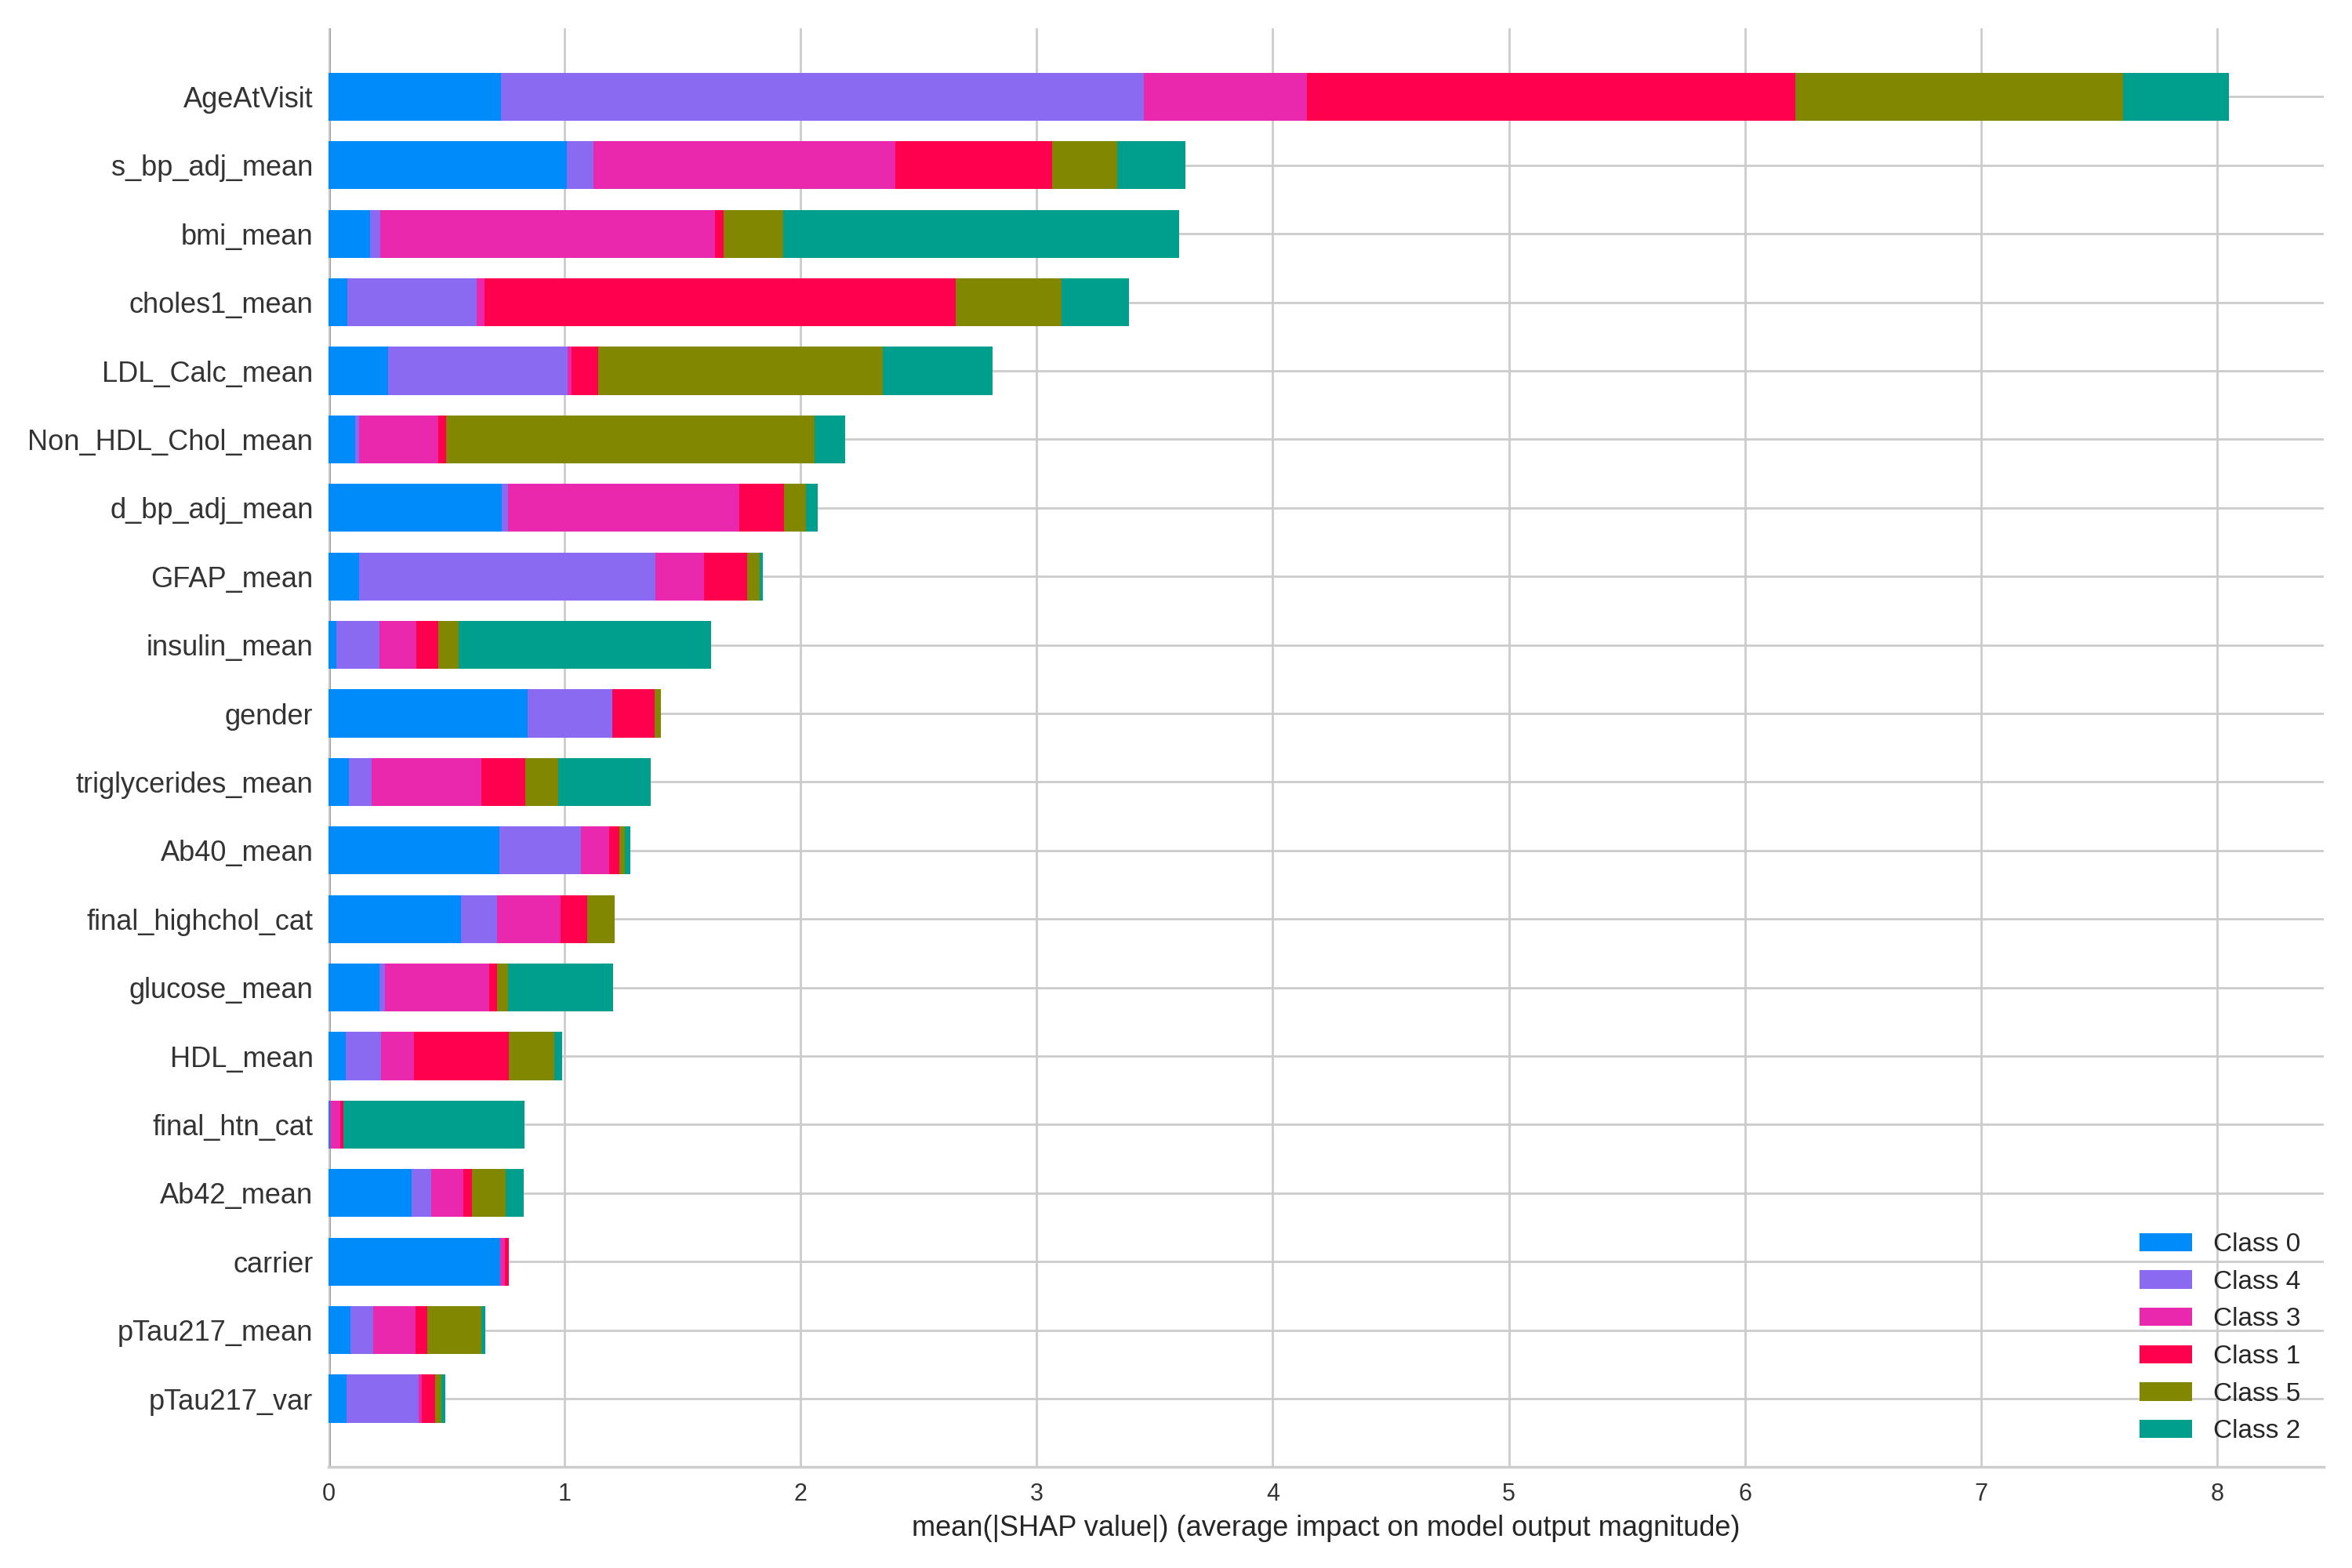

In [82]:
import lightgbm as lgb
import shap

clf_km = lgb.LGBMClassifier(colsample_by_tree=0.8)

for col in ['gender', 'carrier', 'race', 'final_bmi_cat', 'final_htn_cat',
       'final_diab_cat', 'final_highchol_cat']:
    df_no_outliers_norm[col] = df_no_outliers_norm[col].astype('category')

clf_km.fit(X = df_no_outliers_norm , y = clusters, feature_name = "auto", categorical_feature = "auto")
# clf_km.fit(X = df_prueba, y = predict_embedding, feature_name='auto', categorical_feature = 'auto')

#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(df_no_outliers_norm)
shap.summary_plot(shap_values_km, df_no_outliers_norm, plot_type="bar", plot_size=(15, 10))

In [91]:
df_no_outliers = df[df.outliers == 0]
df_no_outliers["cluster"] = clusters

df_no_outliers.groupby('cluster').agg(
    {
        'AgeAtVisit':'mean',
        'bmi_mean':'mean',
        'Ab40_mean': 'mean',
        'Ab42_mean': 'mean',
        'Ab40_Ab42_ratio_mean':'mean',
        'GFAP_mean': 'mean',
        'ptau181_mean': 'mean',
        'pTau217_mean': 'mean',
        'insulin_mean': 'mean',
        'glucose_mean': 'mean',
        'choles1_mean': 'mean',
        'triglycerides_mean': 'mean',
        'LDL_Calc_mean': 'mean',
        'Non_HDL_Chol_mean': 'mean',
        'HDL_mean': 'mean',
        's_bp_adj_mean': 'mean',
        'd_bp_adj_mean': 'mean',
        'gender': lambda x: x.value_counts().index[0],
        'carrier': lambda x: x.value_counts().index[0],
        'race': lambda x: x.value_counts().index[0],
        'final_bmi_cat': lambda x: x.value_counts().index[0],
        'final_htn_cat': lambda x: x.value_counts().index[0],
        'final_diab_cat': lambda x: x.value_counts().index[0],
        'final_highchol_cat': lambda x: x.value_counts().index[0],
    }
).reset_index()

<ipython-input-91-9d346ecf07e0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,AgeAtVisit,bmi_mean,Ab40_mean,Ab42_mean,Ab40_Ab42_ratio_mean,GFAP_mean,ptau181_mean,pTau217_mean,insulin_mean,...,HDL_mean,s_bp_adj_mean,d_bp_adj_mean,gender,carrier,race,final_bmi_cat,final_htn_cat,final_diab_cat,final_highchol_cat
0,0,0.506509,0.384332,0.345933,0.416911,0.036821,0.189422,0.179074,0.134416,0.146259,...,0.241937,0.520984,0.588447,1,1,4,1,0,0,1
1,1,0.765129,0.400851,0.444113,0.518585,0.026701,0.226438,0.217762,0.159576,0.192506,...,0.166542,0.514651,0.546836,1,0,4,1,0,0,0
2,2,0.528725,0.564955,0.398806,0.492894,0.024570,0.188499,0.179075,0.119344,0.312302,...,0.204757,0.399104,0.486405,2,0,4,1,1,0,1
3,3,0.430083,0.305603,0.357893,0.484072,0.022510,0.190387,0.169412,0.120179,0.084916,...,0.347712,0.257311,0.357259,2,0,4,0,0,0,0
4,4,0.753386,0.375327,0.432628,0.518621,0.025677,0.336689,0.240513,0.199443,0.124234,...,0.313383,0.431860,0.461055,2,0,4,1,0,0,0
5,5,0.405627,0.415410,0.387304,0.511161,0.021529,0.186150,0.162317,0.103968,0.139606,...,0.229184,0.349532,0.477668,2,0,4,1,0,0,1


In [83]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 387
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtVisit            350 non-null    float64
 1   bmi_mean              350 non-null    float64
 2   bmi_var               350 non-null    float64
 3   Ab40_mean             350 non-null    float64
 4   Ab40_var              350 non-null    float64
 5   Ab42_mean             350 non-null    float64
 6   Ab42_var              350 non-null    float64
 7   Ab40_Ab42_ratio_mean  350 non-null    float64
 8   Ab40_Ab42_ratio_var   350 non-null    float64
 9   GFAP_mean             350 non-null    float64
 10  GFAP_var              350 non-null    float64
 11  ptau181_mean          350 non-null    float64
 12  ptau181_var           350 non-null    float64
 13  pTau217_mean          350 non-null    float64
 14  pTau217_var           350 non-null    float64
 15  insulin_mean          3

In [85]:
df_no_outliers.head()

,AgeAtVisit,bmi_mean,bmi_var,Ab40_mean,Ab40_var,Ab42_mean,Ab42_var,Ab40_Ab42_ratio_mean,Ab40_Ab42_ratio_var,GFAP_mean,...,s_bp_adj_var,d_bp_adj_mean,d_bp_adj_var,gender,carrier,race,final_bmi_cat,final_htn_cat,final_diab_cat,final_highchol_cat
0,0.607200,0.363945,0.000000,0.389494,0.000000,0.358386,0.000000,0.041749,0.000000e+00,0.225000,...,0.000000,0.728814,0.000000,1,1,4,1,0,0,1
1,0.630137,0.341039,0.000065,0.296735,0.000028,0.283925,0.001246,0.043660,7.346802e-05,0.164679,...,0.002208,0.728814,0.000287,1,0,4,1,1,0,1
2,0.730487,0.292400,0.000103,0.452595,0.000500,0.476688,0.000830,0.031189,5.026498e-06,0.594231,...,0.025554,0.451977,0.032845,2,1,4,0,0,0,0
3,0.546352,0.342100,0.000000,0.322291,0.000000,0.409186,0.000000,0.024385,0.000000e+00,0.139423,...,0.000000,0.542373,0.000000,2,1,4,1,0,0,1
4,0.612297,0.475292,0.000137,0.460483,0.000045,0.499652,0.000004,0.029153,8.951379e-07,0.328846,...,0.000068,0.567797,0.007038,2,0,4,1,0,1,1
